# Annotations by risk scores sourcing data from files

## Read risk scores

In [2]:
import os

import pandas as pd


predictionsDir = os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/predictions'

predictionsDfList = []
for mortality in [7, 14, 30]:
    for wa in [1, 2, 3]:
        predictionsFile = predictionsDir + '/wb_365_wa_' + str(wa) + '/' + str(mortality) + '_day_mortality_normal.csv'
        tempDf = pd.read_csv(predictionsFile)
        tempDf['mortality'] = mortality
        tempDf['wa'] = wa
        predictionsDfList.append(tempDf)

predictionsDf = pd.concat(predictionsDfList, ignore_index=True)
predictionsDf

person_id  JOURNEY_ID     preds  mortality  wa
0         51211    17360979  0.032720          7   1
1         51211    17371307  0.000055          7   1
2         51211    17419909  0.000245          7   1
3         51211    17422049  0.000019          7   1
4         51211    17495894  0.000153          7   1
...         ...         ...       ...        ...  ..
8266    2678697    17471674  0.000848         30   3
8267    2679272    17485225  0.864064         30   3
8268    2680486    17502337  0.018188         30   3
8269    2682433    17536805  0.151517         30   3
8270    2684042    17565390  0.014253         30   3

[8271 rows x 5 columns]

## Read mapping information

In [7]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

person_id  visit_occurrence_id       TYPE COUNTRY_OF_BIRTH     SEX  \
0        678487              3312694  Emergency        Australia    Male   
1       2094045              9199249  Emergency        Australia    Male   
2       2107813              9410987  Emergency        Australia    Male   
3       2083212               602890  Inpatient        Australia  Female   
4       2083212              9039437  Emergency        Australia  Female   
...         ...                  ...        ...              ...     ...   
7194    2603535             16588204  Inpatient        Australia    Male   
7195    2603535             16709341  Inpatient        Australia    Male   
7196    2603535             16651755  Inpatient        Australia    Male   
7197    2098616             16872774  Emergency        Australia  Female   
7198    2098616             16869916  Emergency        Australia  Female   

       Age_Bin  JOURNEY_ID  
0     (60, 70]     3312694  
1     (20, 30]     9199249  
2     (50, 60]     9410987  
3     (40, 50]     9039437  
4     (40, 50]     9039437  
...        ...         ...  
7194  (60, 70]    16588204  
7195  (60, 70]    16709341  
7196  (60, 70]    16651755  
7197  (80, 90]    16872774  
7198  (80, 90]    16869916  

[7199 rows x 7 columns]

In [8]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

tube_code  PATIENT_ID  db_ID  pt_age pt_gender  EPISODE_ID  \
0      AH19J072    213972.0  3JNQS      64      Male  12931474.0   
1      AH19J074    213972.0  3JNQS      64      Male  12931474.0   
2      AH19B003    526238.0  567AE      85      Male    640261.0   
3      AH20A024    788941.0  3YBDS      58    Female  13194824.0   
4      AH20L041   1023735.0  2VJ78      42      Male  14210147.0   
...         ...         ...    ...     ...       ...         ...   
3112  ALF22L076    639020.0  3S6HL      84      Male  17219899.0   
3113  ALF22L089    655404.0  6EWBM      67    Female         NaN   
3114  ALF22L138   2572048.0  YM5PJ      61      Male         NaN   
3115  ALF23A102   2054964.0  5DYAH      35    Female  17294287.0   
3116  ALF23B102   2015952.0  57E2W      82    Female  17281239.0   

     hospital_admission hospital_discharge hospital_in_last_year  \
0            2019-10-17         2019-11-29                   yes   
1            2019-10-17         2019-11-29                   yes   
2            2019-02-04         2019-02-07                    no   
3            2020-01-16         2020-01-19                    no   
4            2020-12-18         2021-01-05                   yes   
...                 ...                ...                   ...   
3112         2022-12-15         2022-12-20                   yes   
3113                NaN                NaN                   NaN   
3114                NaN                NaN                   NaN   
3115         2023-01-12         2023-02-01                   yes   
3116         2023-01-08         2023-02-16                    no   

                        genome_species                species_reported  \
0                     Escherichia coli                Escherichia coli   
1                Streptococcus sp. D19       Streptococcus mitis group   
2                     Escherichia coli                Escherichia coli   
3                     Escherichia coli                Escherichia coli   
4                Staphylococcus aureus           Staphylococcus aureus   
...                                ...                             ...   
3112        Streptococcus vestibularis  Streptococcus salivarius group   
3113                  Proteus columbae                Proteus vulgaris   
3114         Enterobacter roggenkampii    Enterobacter cloacae complex   
3115        Streptococcus constellatus   Streptococcus anginosus group   
3116  Acinetobacter colistiniresistens           Acinetobacter species   

      contig_number   length tube_code_duplicate_or_old date_of_collection  \
0                92  5131021                        NaN         2019-10-30   
1                84  2022991                        NaN         2019-10-30   
2                93  4942915                        NaN         2019-02-03   
3               110  5149157                        NaN         2020-01-16   
4                46  2735216                        NaN         2020-12-16   
...             ...      ...                        ...                ...   
3112            107  1938627                        NaN         2022-12-15   
3113            152  3972219                        NaN         2022-12-17   
3114             66  4876179                        NaN         2022-12-27   
3115             54  1869828                        NaN         2023-01-11   
3116            233  3952992                        NaN         2023-02-15   

        ID_number location_additional_02 collected_from_original  
0     19-303-0997             A-7EA;HAEM                   Blood  
1     19-303-1174             A-7EA;HAEM        Blood Peripheral  
2     19-034-1596              A-4WB;GMC                   Blood  
3     20-016-2112         S-ED;Emergency            Blood Venous  
4     20-351-2856     Emergency Dept;nan                   Blood  
...           ...                    ...                     ...  
3112  22-349-2150               Ward 4WB        Blood Peripheral  
3113  22-3

In [9]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

person_id  JOURNEY_ID  tube_code
0        50056    13224842   AH20B011
1        62567    12645629   AH19G065
2       138108    14737781   AH21E052
3       211314    13955099   AH20J009
4       211314    13955099    KPN2214
..         ...         ...        ...
512    2677962    17459522  ALF23C220
513    2684042    17565390  ALF23D001
514    2207334    15581117   AH21J066
515    2638484    16969999  ALF22K143
516    2015952    17281239  ALF23B102

[517 rows x 3 columns]

In [12]:
mergedDf = predictionsDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['person_id', 'JOURNEY_ID']
)
mergedDf

person_id  JOURNEY_ID     preds  mortality  wa  tube_code
0        138004    17354479  0.005408          7   1  ALF23C052
1        138004    17354479  0.010567          7   2  ALF23C052
2        138004    17354479  0.006408          7   3  ALF23C052
3        138004    17354479  0.031596         14   1  ALF23C052
4        138004    17354479  0.088641         14   2  ALF23C052
...         ...         ...       ...        ...  ..        ...
1051    2684042    17565390  0.002694         30   2  ALF23D001
1052    2684042    17565390  0.014253         30   3  ALF23D001
1053    2571565    16045917  0.019733          7   3  ALF22E058
1054    2571565    16045917  0.002638         14   3  ALF22E058
1055    2571565    16045917  0.000863         30   3  ALF22E058

[1056 rows x 6 columns]

## Read annotations

In [33]:
gff3DfList = []
for i, row in mergedDf.iterrows():
    fileName = os.environ['GENOMICS_DATA_BASE'] + '/annotations/s_aureus_gff3/' + row.tube_code + '.gff3'
    if(os.path.isfile(fileName)):
        gff3Df = pd.read_csv(
            os.environ['GENOMICS_DATA_BASE'] + '/annotations/s_aureus_gff3/AH19J013.gff3',
            comment='#',
            sep='\t',
            names=['sequence_id', 'source', 'feature_type', 'feature_start', 'feature_end', 'score', 'strand', 'phase', 'atributes']
        )
        gff3Df['id'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'ID']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['name'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'Name']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['gene'] = gff3Df.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'gene']).apply(lambda x: None if (len(x) == 0) else x[0])
        gff3Df['tube_code'] = row.tube_code
        gff3DfList.append(gff3Df)
annotationsDf = pd.concat(gff3DfList, ignore_index=True)
annotationsDf

sequence_id    source feature_type  feature_start  feature_end score  \
0                 1     Bakta       region              1       652243     .   
1                 1  Prodigal          CDS              8          814     .   
2                 1  Prodigal          CDS            837         1202     .   
3                 1  Prodigal          CDS           1330         1899     .   
4                 1  Prodigal          CDS           2085         2432     .   
...             ...       ...          ...            ...          ...   ...   
428548           39     Bakta       region              1          120     .   
428549           40     Bakta       region              1          118     .   
428550           41     Bakta       region              1          110     .   
428551           42     Bakta       region              1          107     .   
428552           43     Bakta       region              1          106     .   

       strand phase                                          atributes  \
0           +     .                                        ID=1;Name=1   
1           -     0  ID=GLCGMF_00005;Name=protease adaptor protein ...   
2           -     0  ID=GLCGMF_00010;Name=truncated hemoglobin YjbI...   
3           -     0  ID=GLCGMF_00015;Name=putative triphosphatase o...   
4           +     0  ID=GLCGMF_00020;Name=UPF0738 protein SAUSA300_...   
...       ...   ...                                                ...   
428548      +     .                                      ID=39;Name=39   
428549      +     .                                      ID=40;Name=40   
428550      +     .                                      ID=41;Name=41   
428551      +     .                                      ID=42;Name=42   
428552      +     .                                      ID=43;Name=43   

                  id                                               name  gene  \
0                  1                                                  1  None   
1       GLCGMF_00005                      protease adaptor protein YjbH  yjbH   
2       GLCGMF_00010                          truncated hemoglobin YjbI  yjbI   
3       GLCGMF_00015  putative triphosphatase or cyclase YjbK%2C con...  yjbK   
4       GLCGMF_00020                      UPF0738 protein SAUSA300_0906  None   
...              ...                                                ...   ...   
428548            39                                                 39  None   
428549            40                                                 40  None   
428550            41                                                 41  None   
428551            42                                                 42  None   
428552            43                                                 43  None   

        tube_code  
0       ALF22G032  
1       ALF22G032  
2       ALF22G032  
3       ALF22G032  
4       ALF22G032  
...           ...  
428548  ALF23C124  
428549  ALF23C124  
428550  ALF23C124  
428551  ALF23C124  
428552  ALF23C124  

[428553 rows x 13 columns]

## Merge all the data

In [36]:
finalDf = annotationsDf.merge(
    mergedDf,
    how='inner',
    on=['tube_code']
)
finalDf

sequence_id source feature_type  feature_start  feature_end score  \
0                  1  Bakta       region              1       652243     .   
1                  1  Bakta       region              1       652243     .   
2                  1  Bakta       region              1       652243     .   
3                  1  Bakta       region              1       652243     .   
4                  1  Bakta       region              1       652243     .   
...              ...    ...          ...            ...          ...   ...   
3856972           43  Bakta       region              1          106     .   
3856973           43  Bakta       region              1          106     .   
3856974           43  Bakta       region              1          106     .   
3856975           43  Bakta       region              1          106     .   
3856976           43  Bakta       region              1          106     .   

        strand phase      atributes  id name  gene  tube_code  person_id  \
0            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
1            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
2            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
3            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
4            +     .    ID=1;Name=1   1    1  None  ALF22G032    1733673   
...        ...   ...            ...  ..  ...   ...        ...        ...   
3856972      +     .  ID=43;Name=43  43   43  None  ALF23C124    2679272   
3856973      +     .  ID=43;Name=43  43   43  None  ALF23C124    2679272   
3856974      +     .  ID=43;Name=43  43   43  None  ALF23C124    2679272   
3856975      +     .  ID=43;Name=43  43   43  None  ALF23C124    2679272   
3856976      +     .  ID=43;Name=43  43   43  None  ALF23C124    2679272   

         JOURNEY_ID     preds  mortality  wa  
0          16562760  0.000542          7   1  
1          16562760  0.000099          7   2  
2          16562760  0.001330          7   3  
3          16562760  0.000294         14   1  
4          16562760  0.002582         14   2  
...             ...       ...        ...  ..  
3856972    17485225  0.021166         14   2  
3856973    17485225  0.453465         14   3  
3856974    17485225  0.961186         30   1  
3856975    17485225  0.057026         30   2  
3856976    17485225  0.864064         30   3  

[3856977 rows x 18 columns]

## Plot

In [70]:
finalDf[['sequence_id', 'feature_type', 'source']].groupby(by=['feature_type', 'source']).agg('count')

sequence_id
feature_type      source                  
CDS               Bakta              20655
                  Prodigal         3533382
ncRNA             Infernal          115668
oriC              BLAST+              2754
oriT              BLAST+              1377
rRNA              Infernal            5508
region            Bakta              59211
regulatory_region Infernal           34425
tRNA              tRNAscan-SE        82620
tmRNA             Aragorn             1377

### Plot for high risk scores

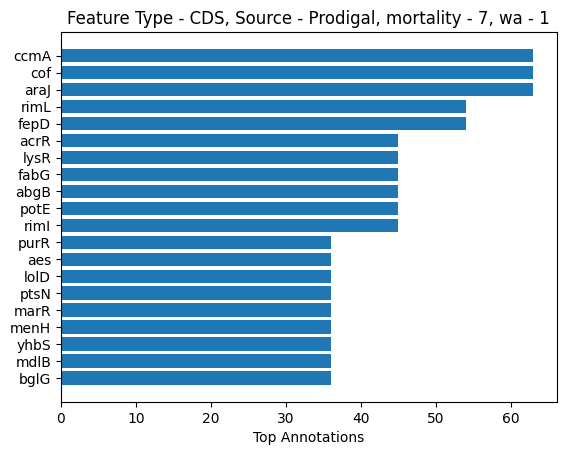

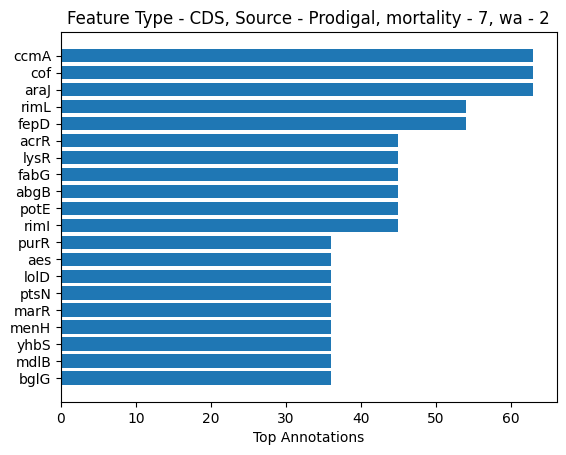

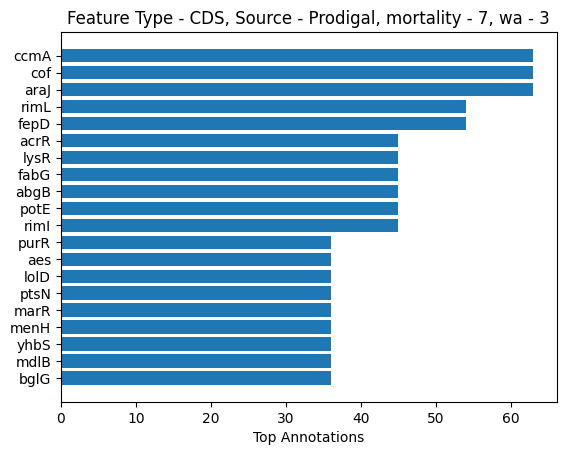

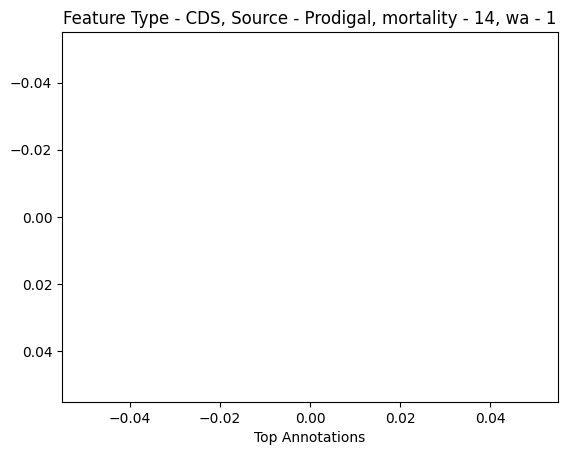

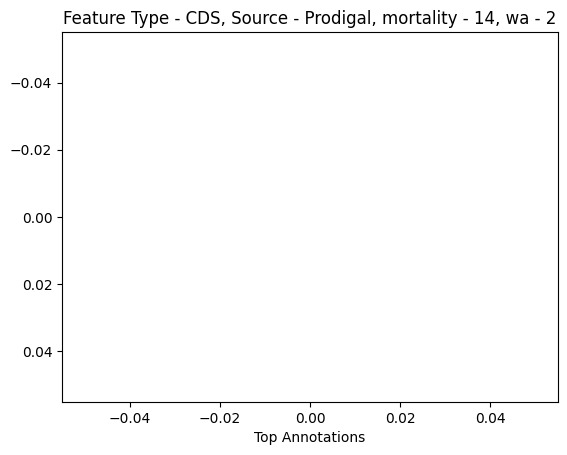

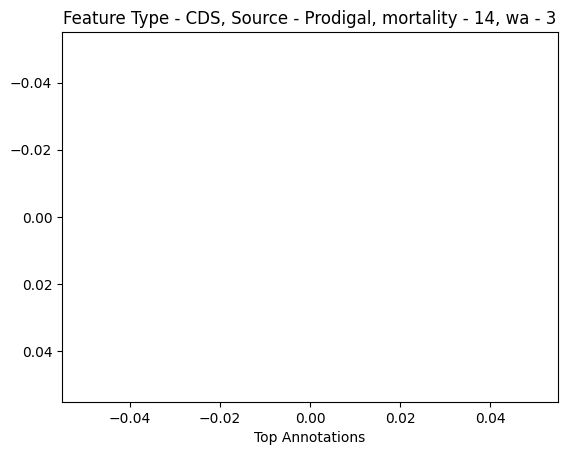

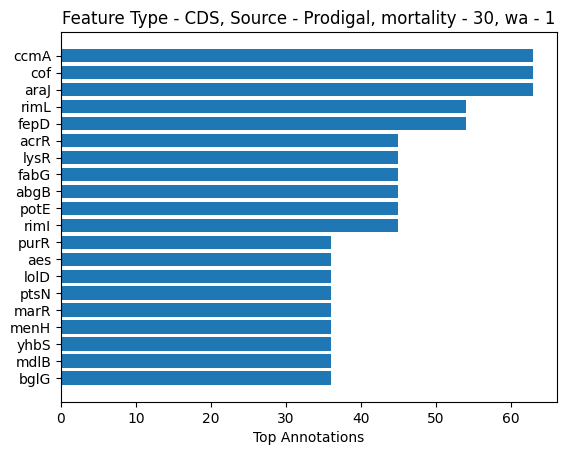

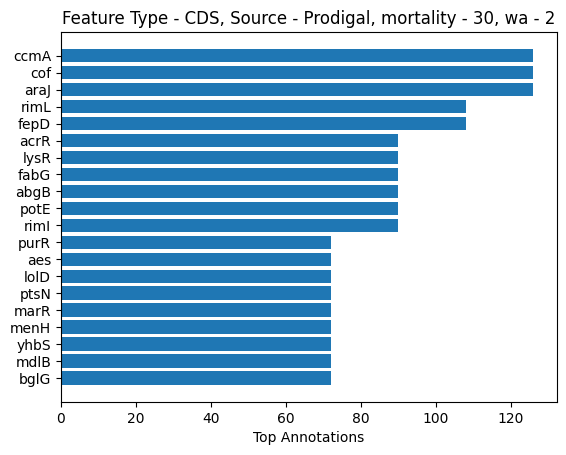

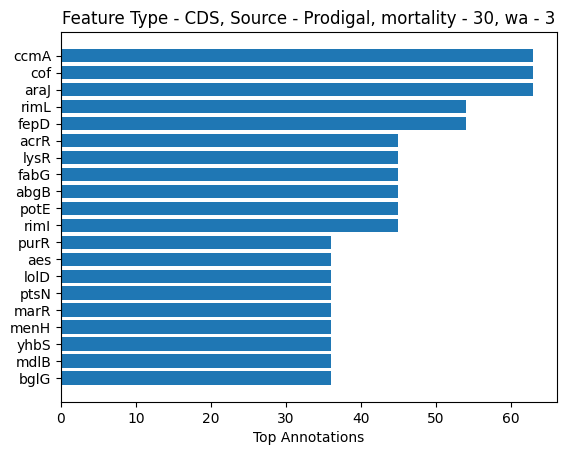

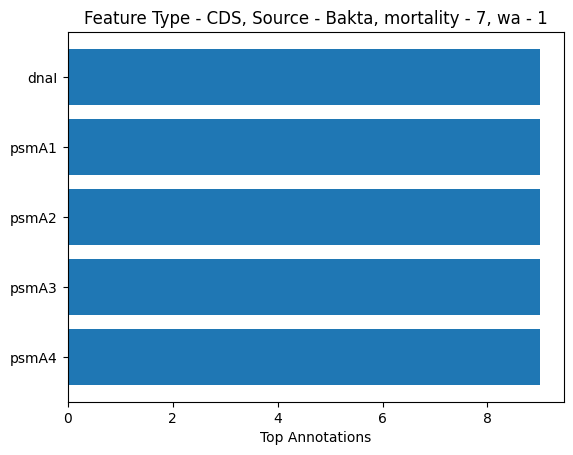

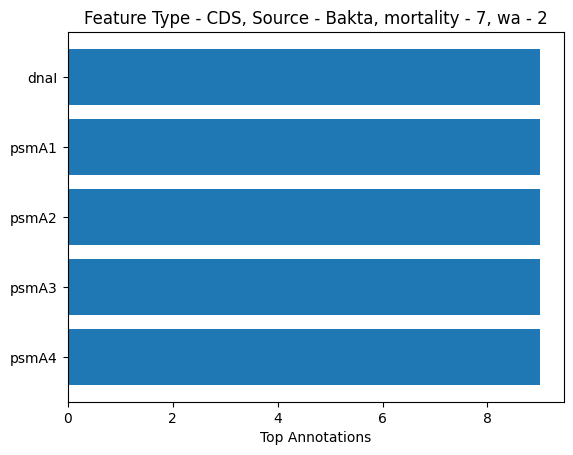

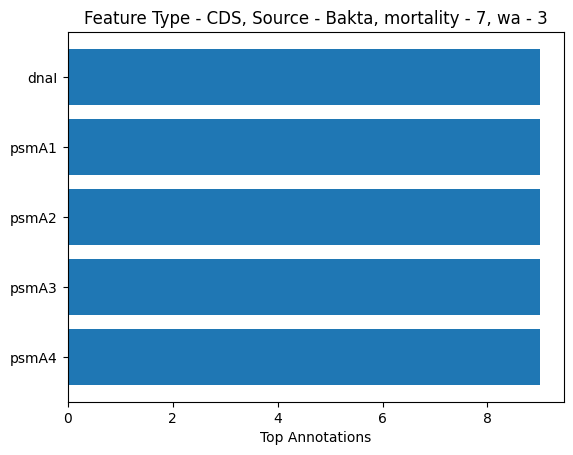

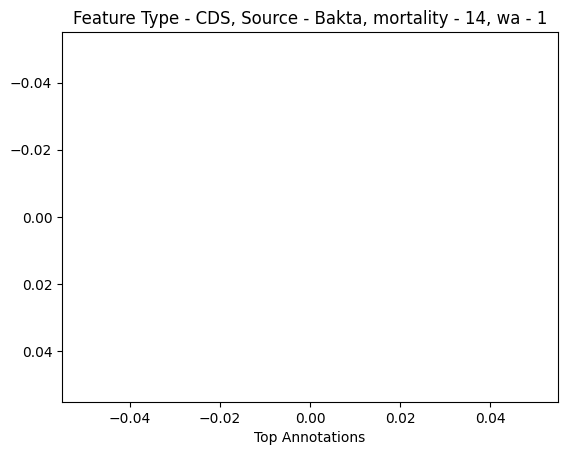

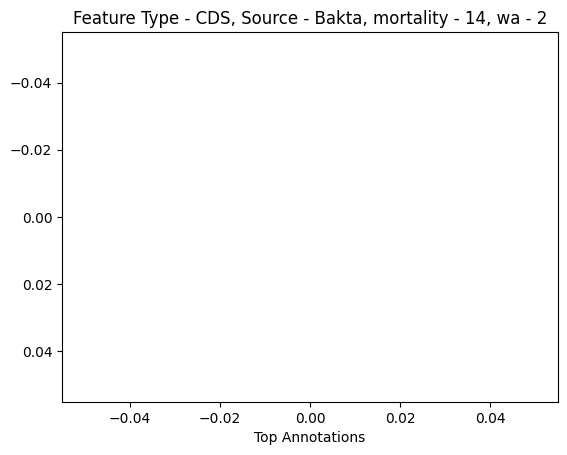

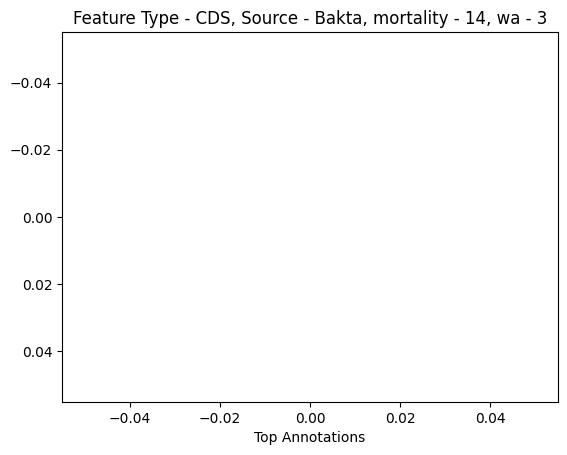

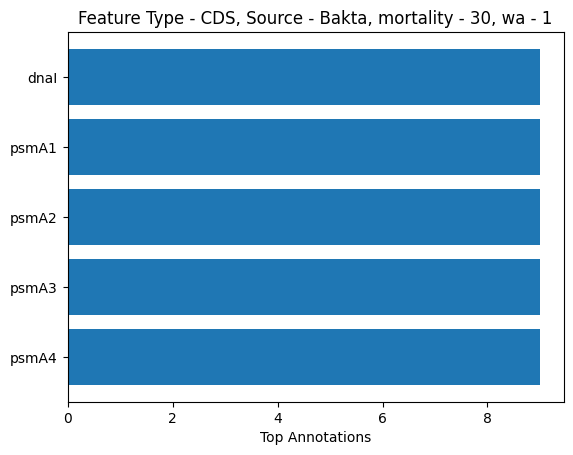

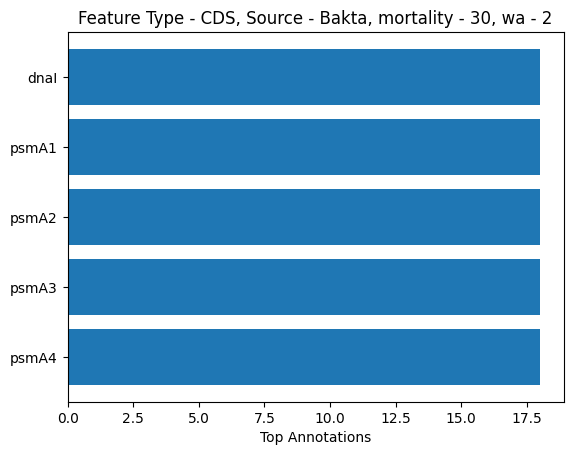

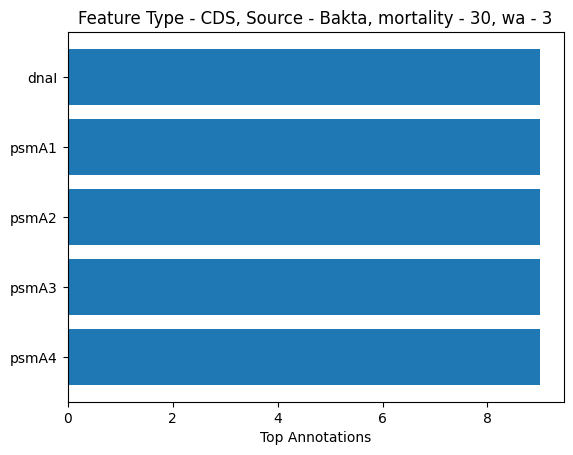

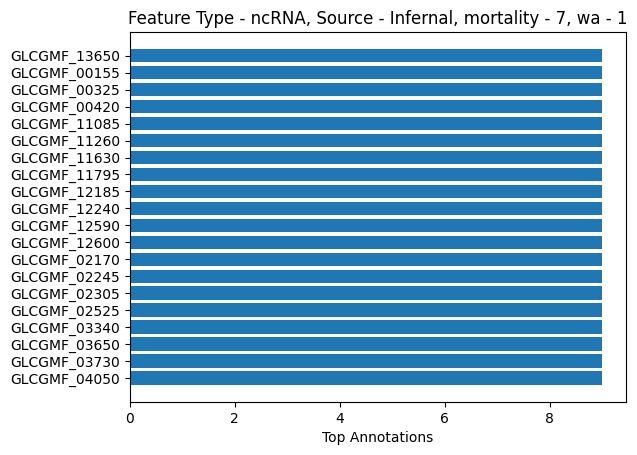

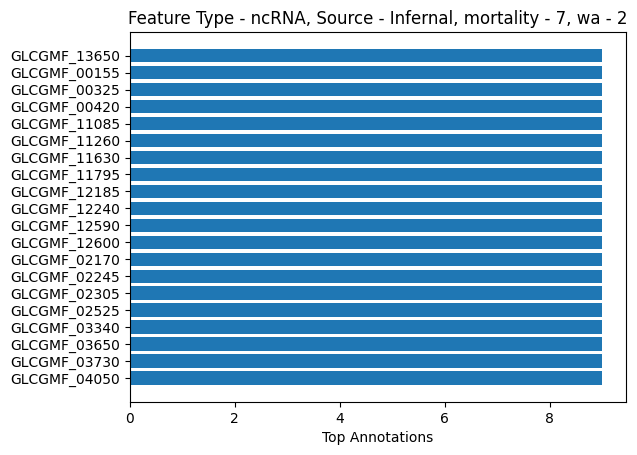

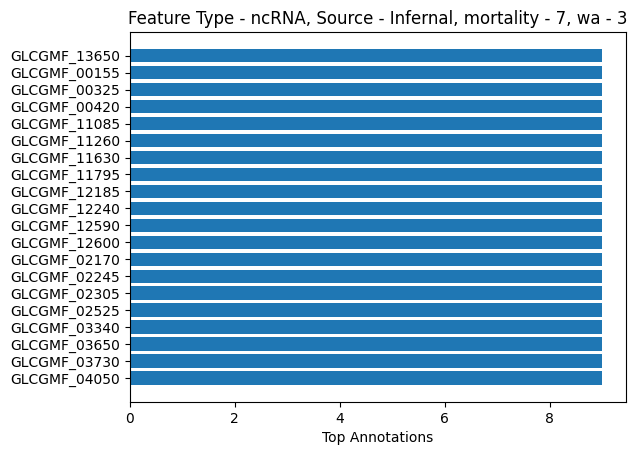

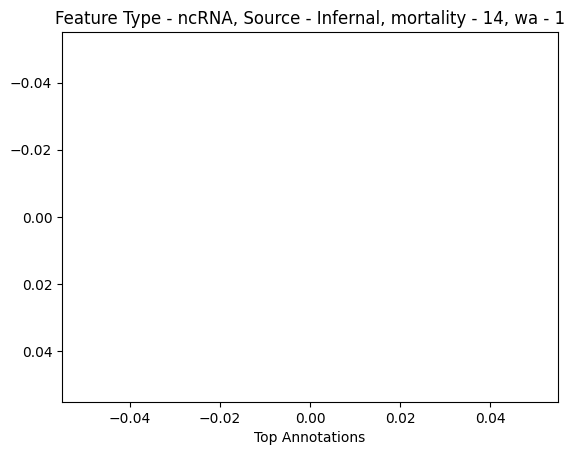

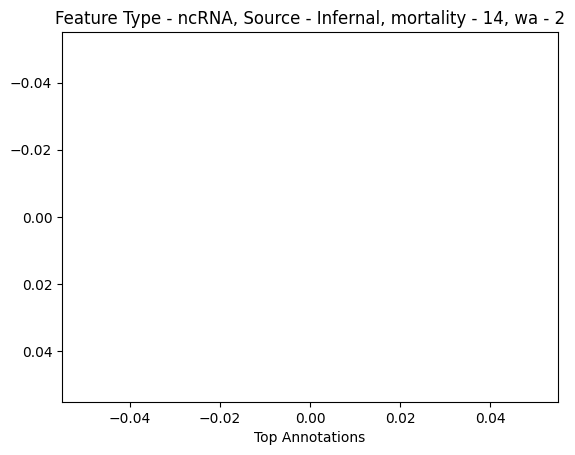

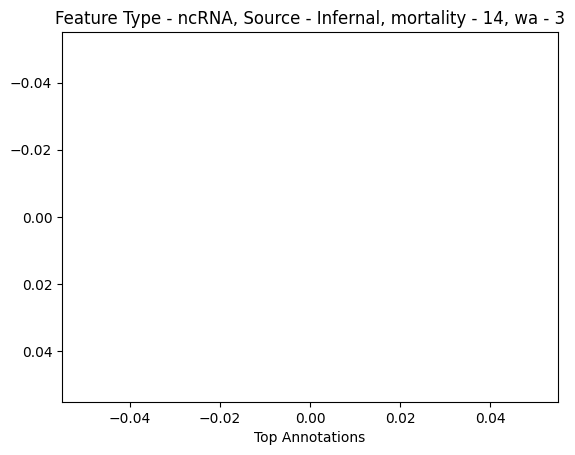

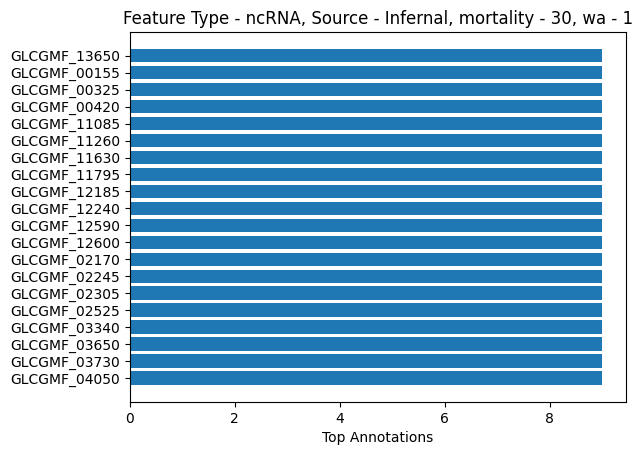

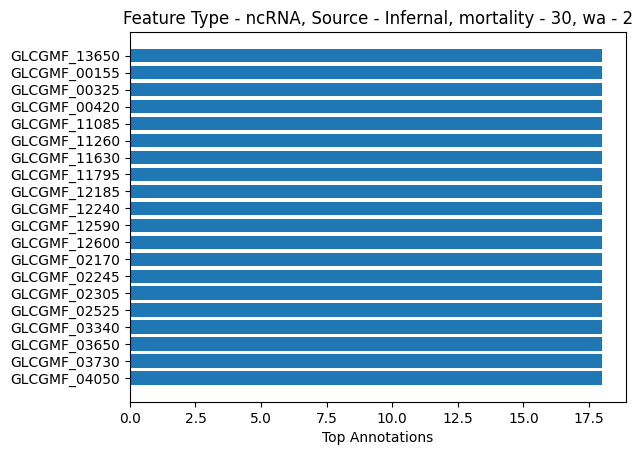

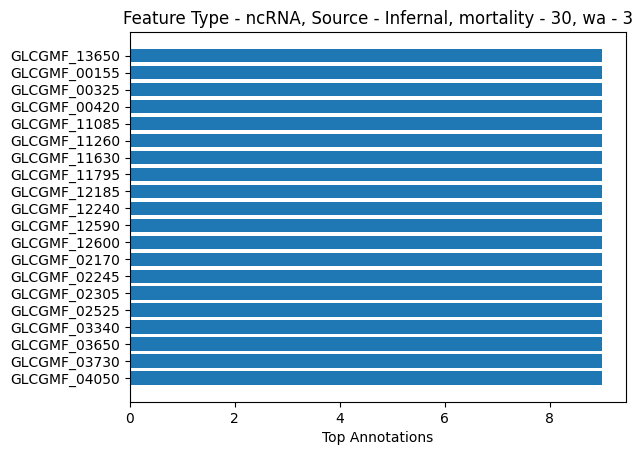

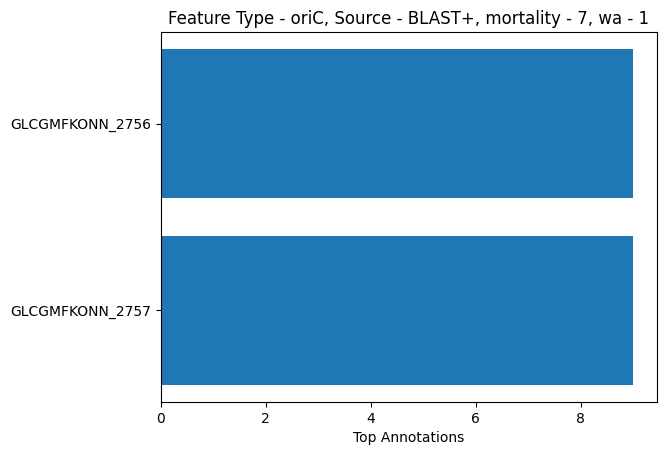

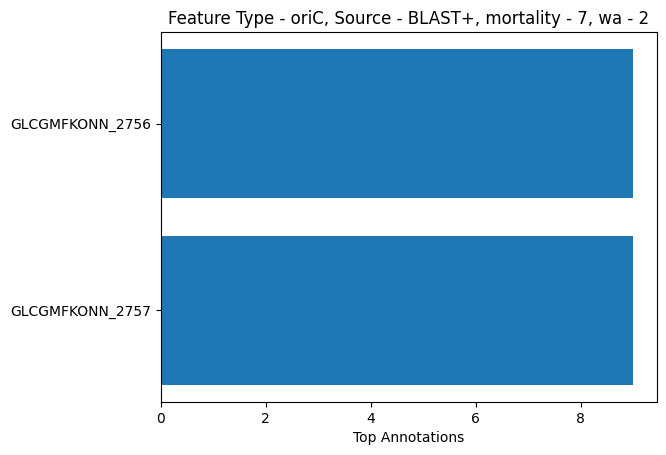

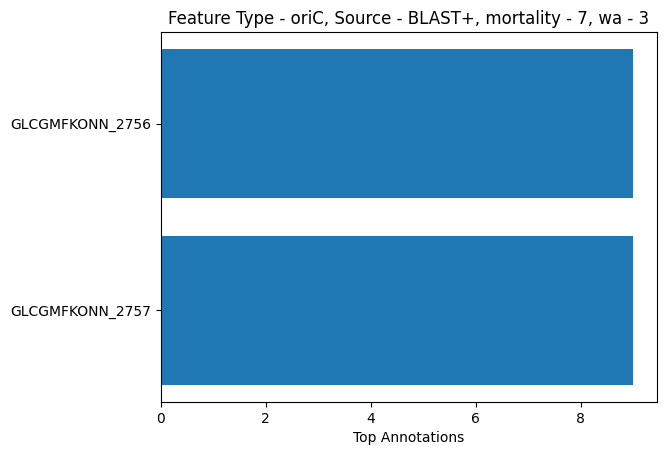

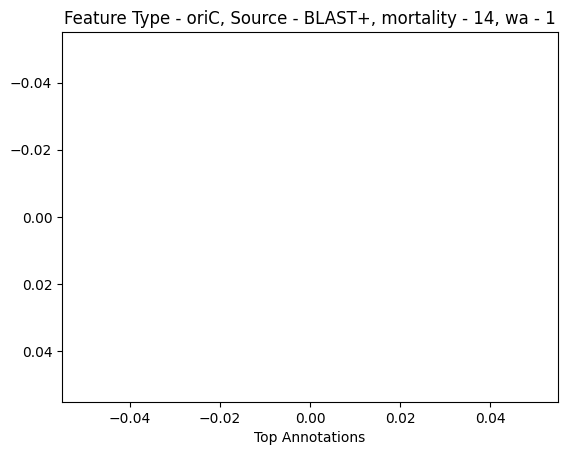

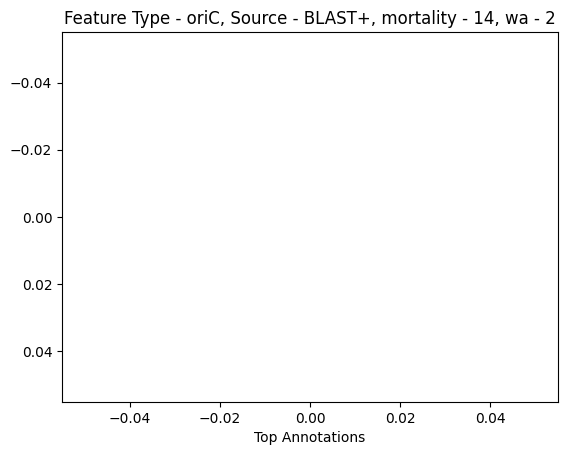

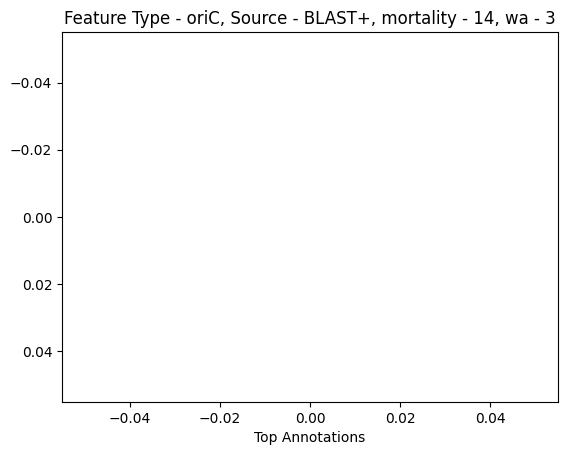

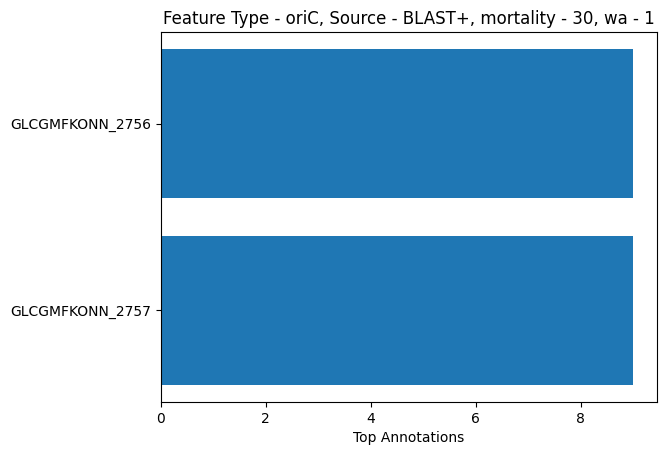

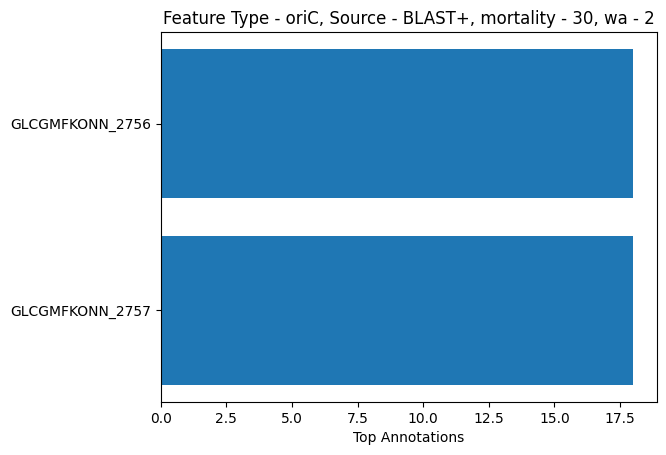

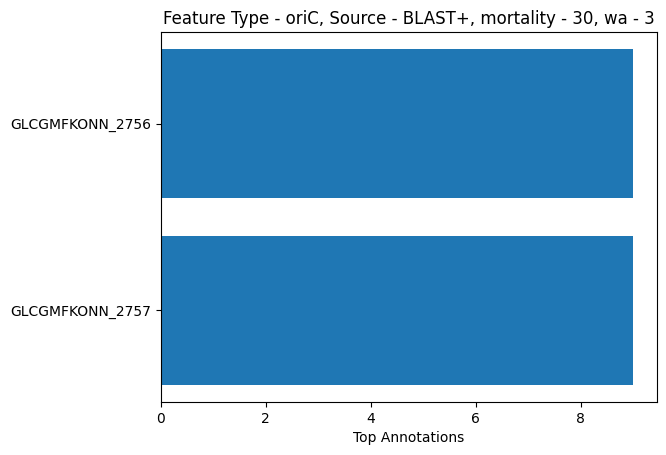

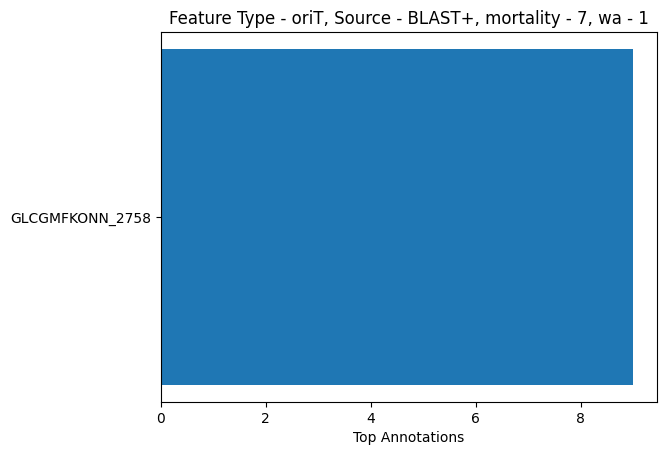

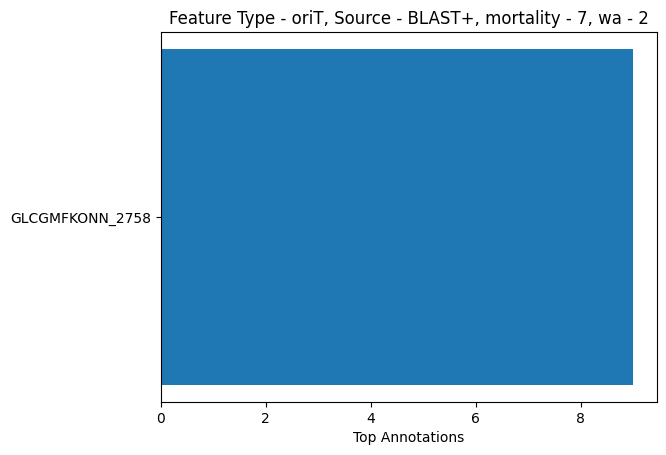

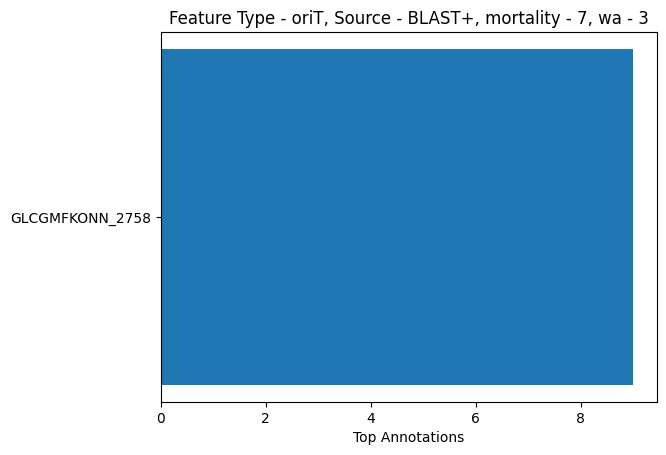

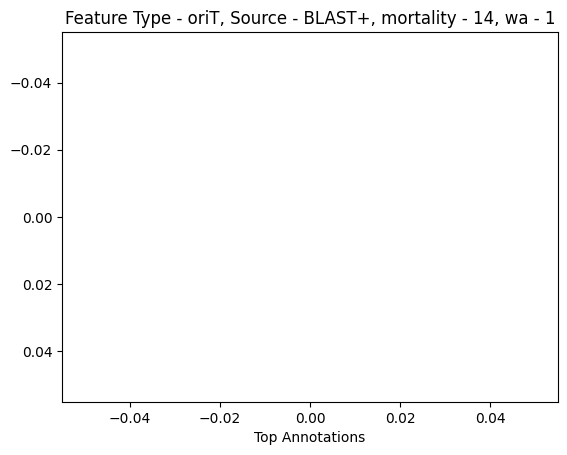

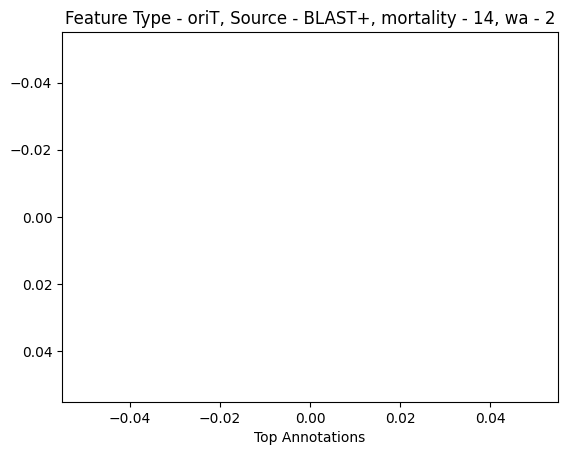

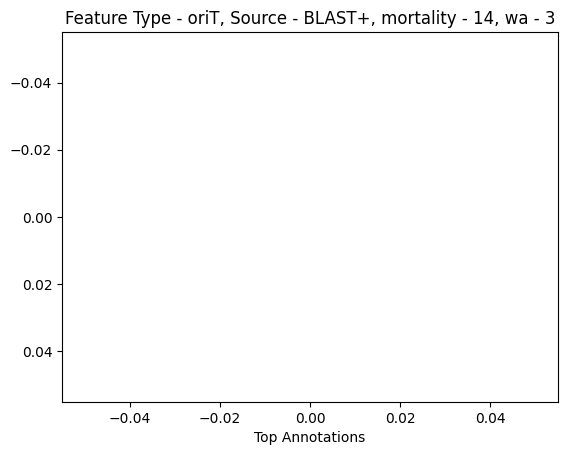

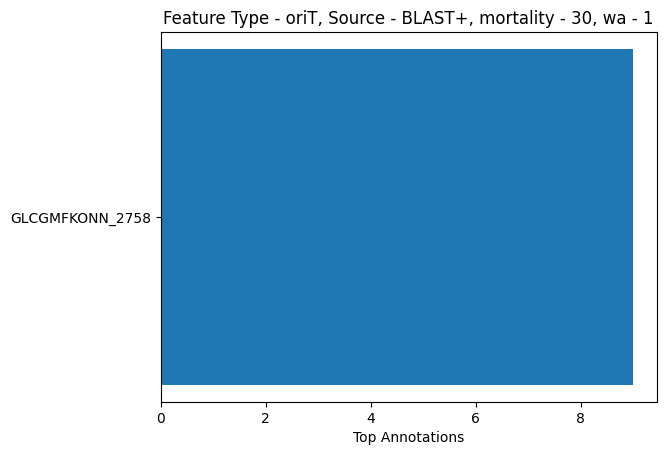

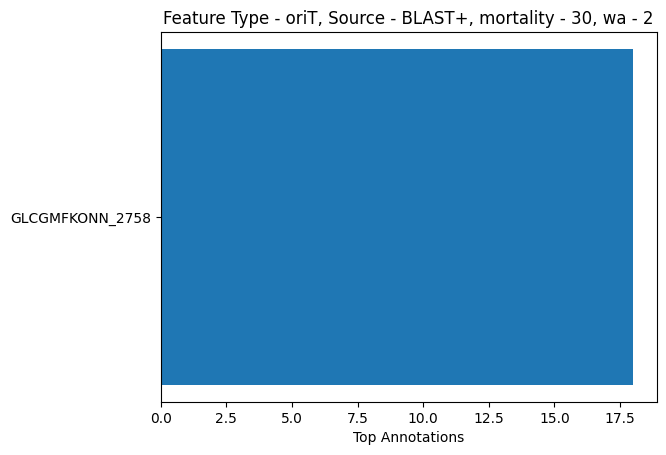

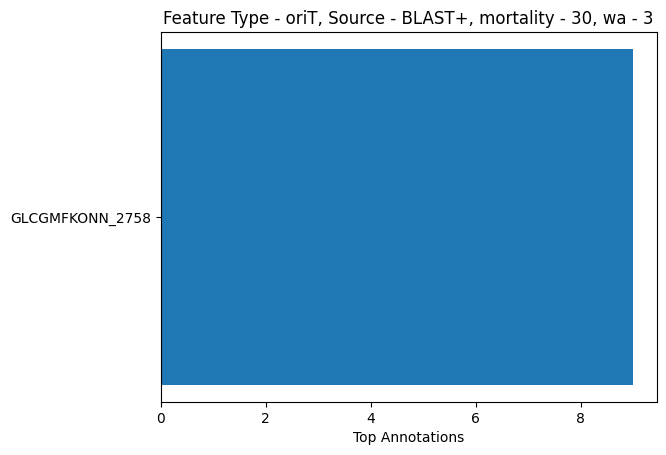

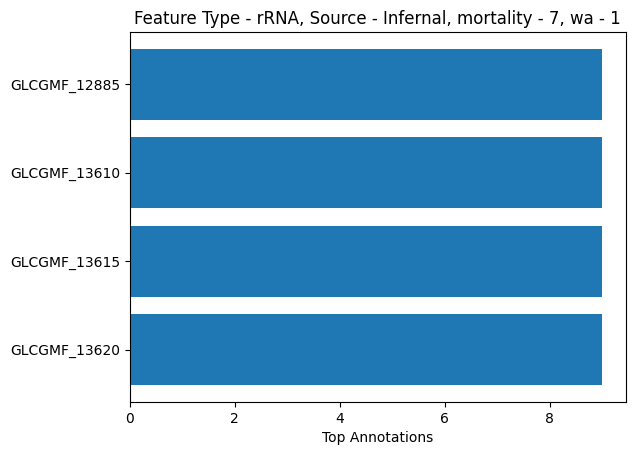

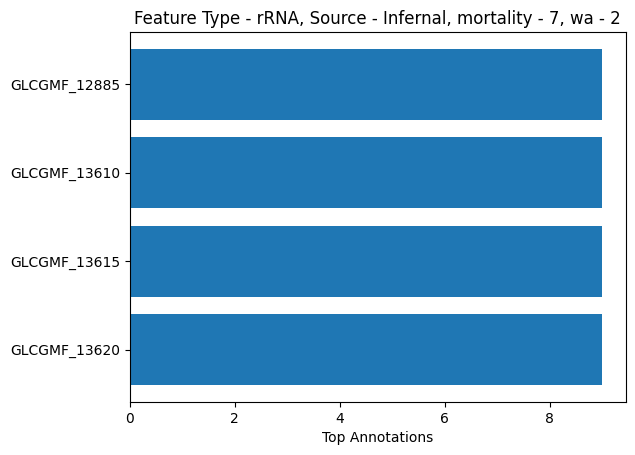

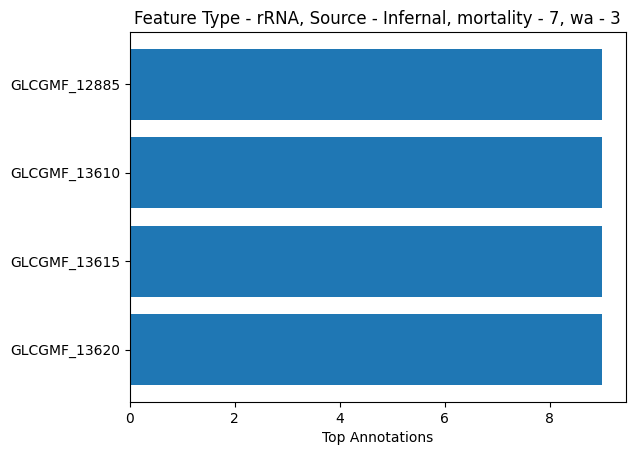

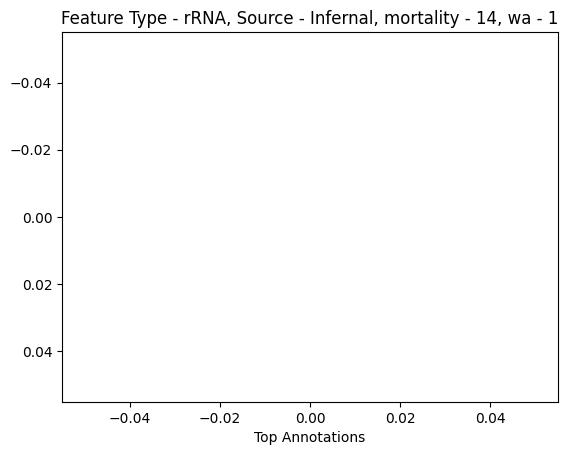

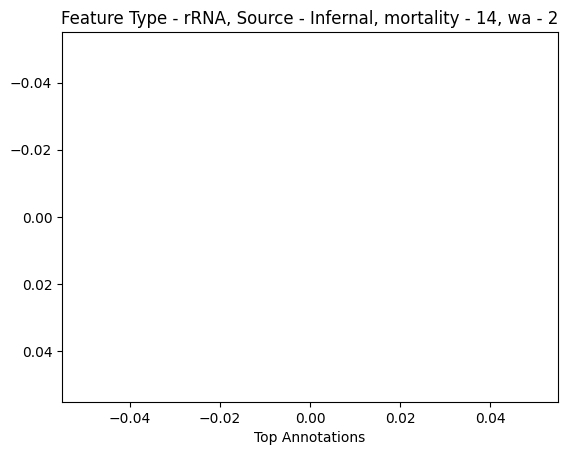

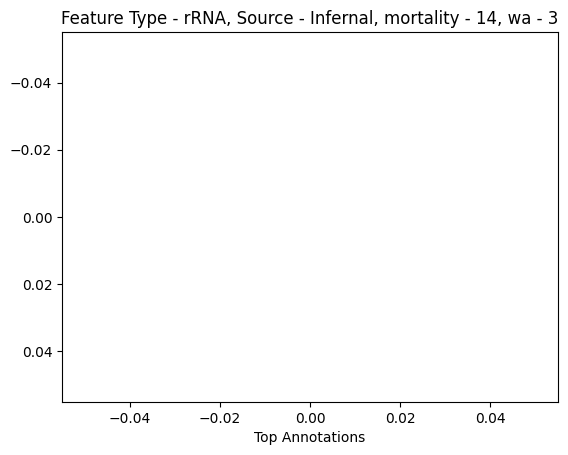

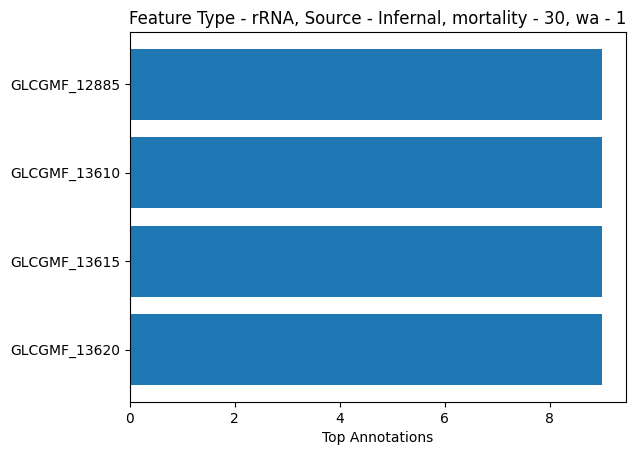

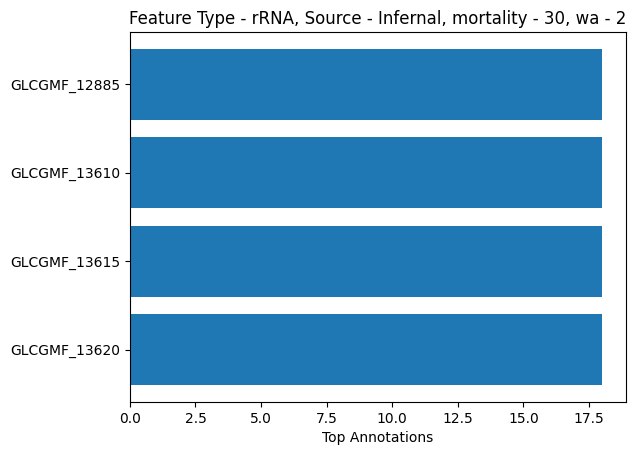

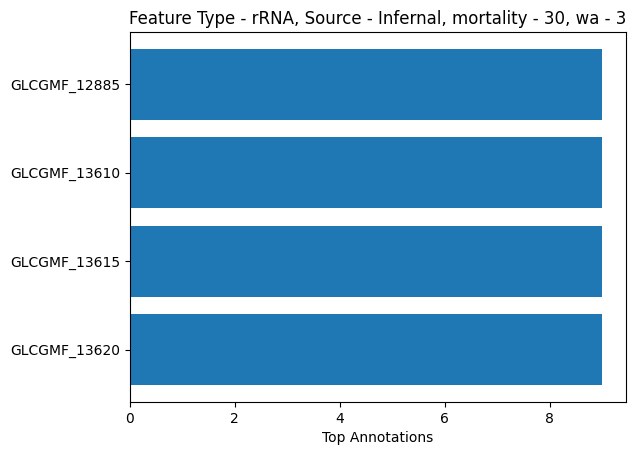

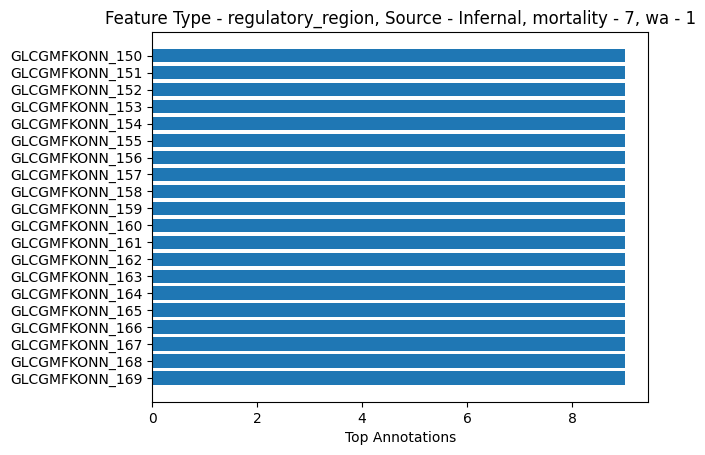

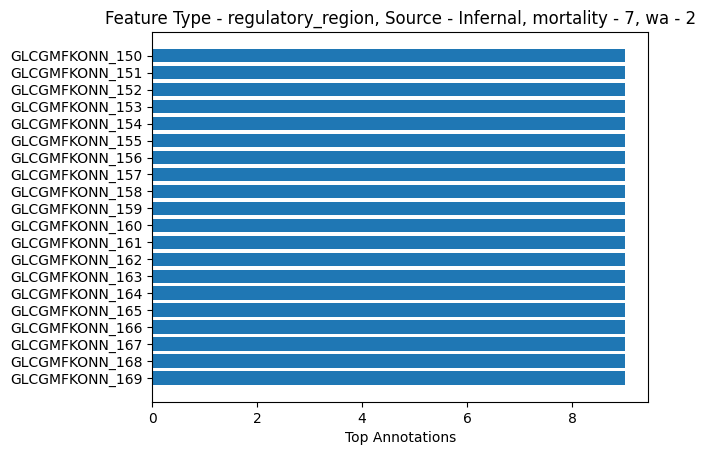

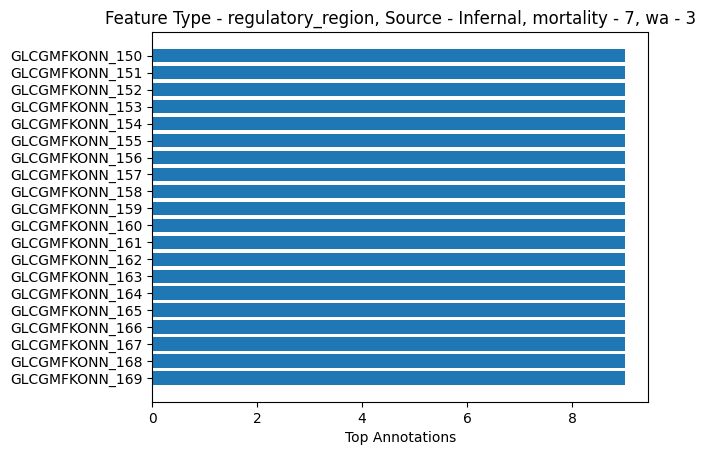

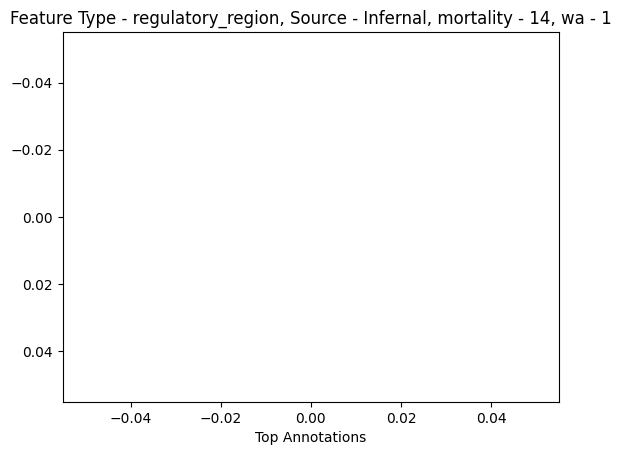

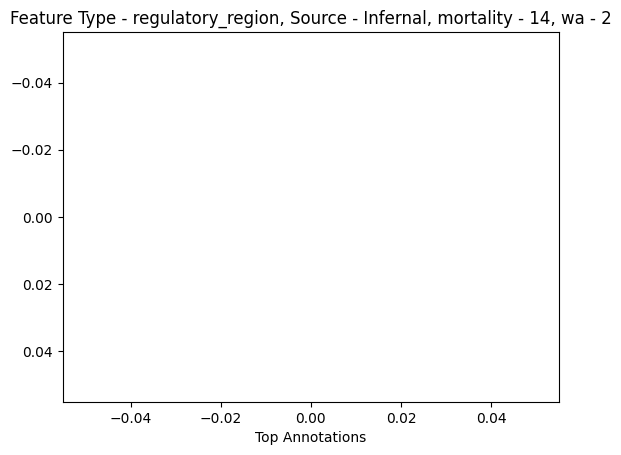

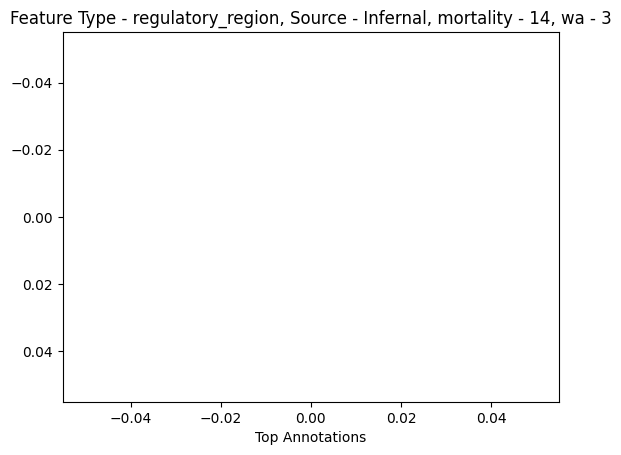

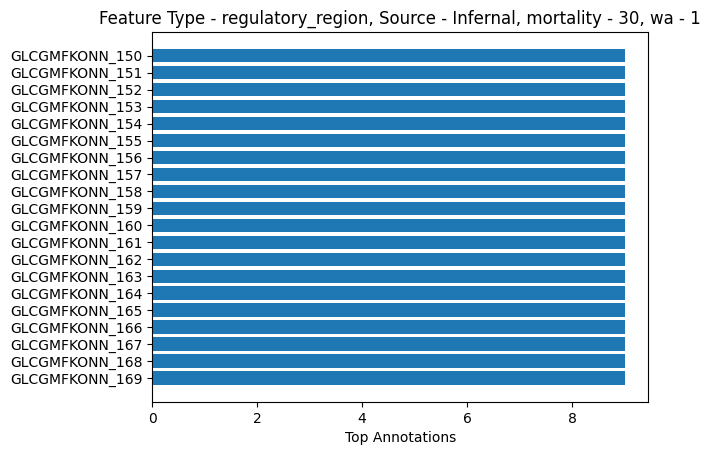

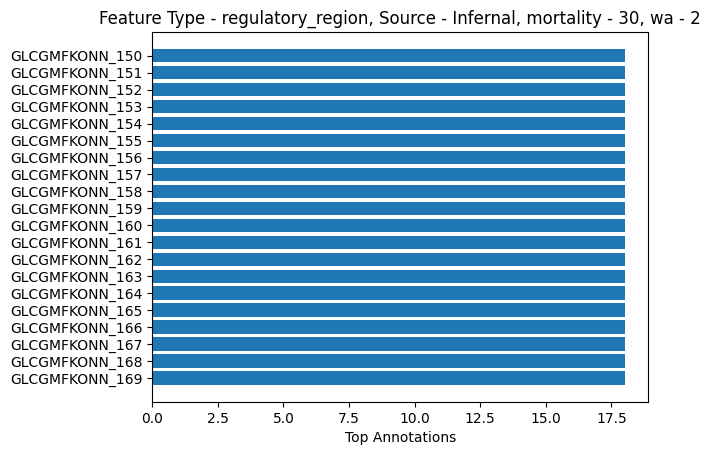

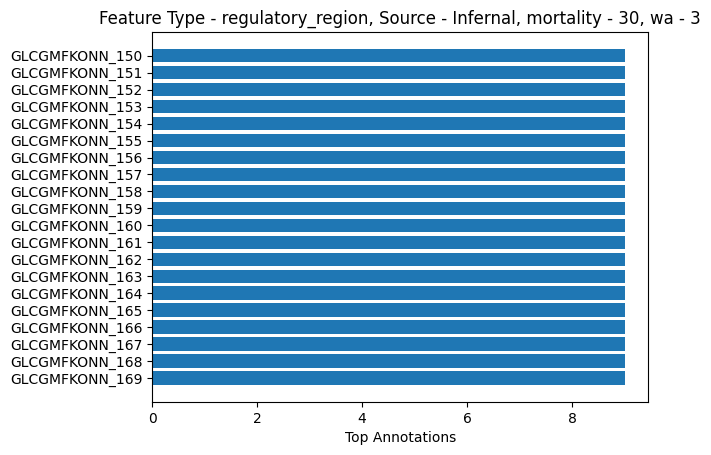

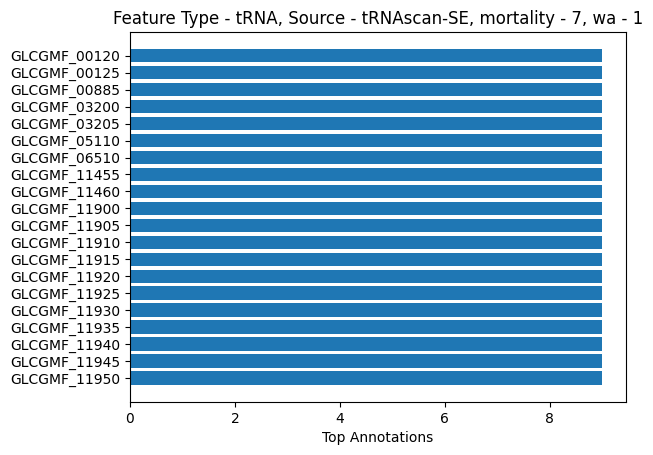

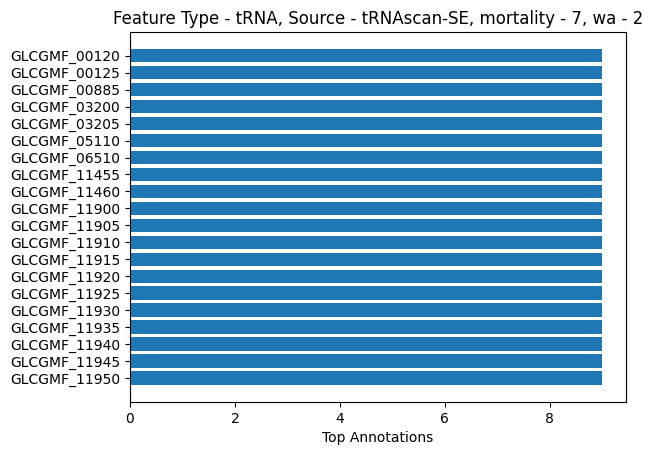

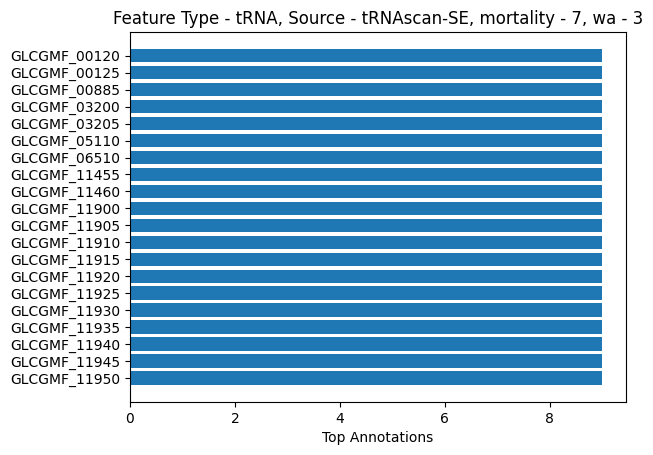

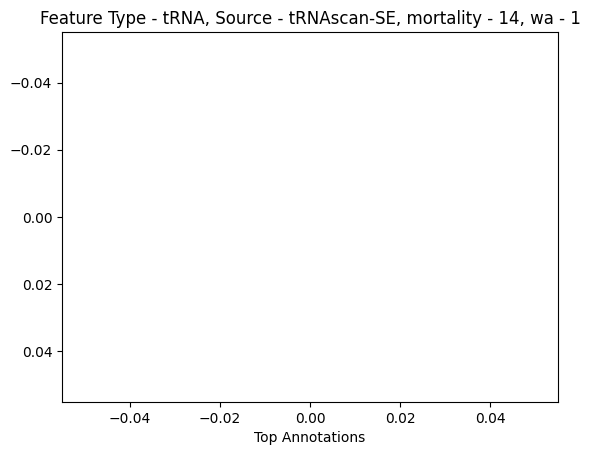

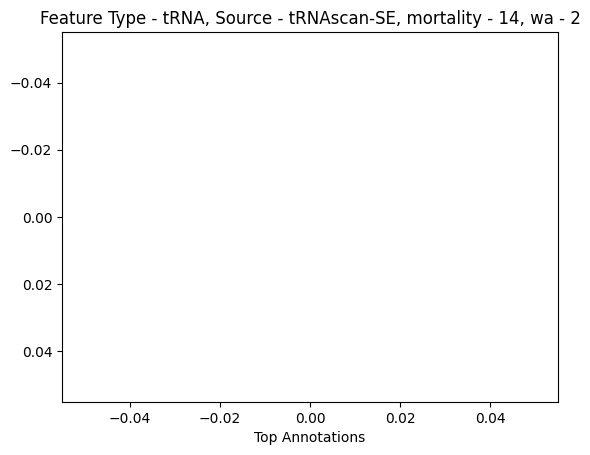

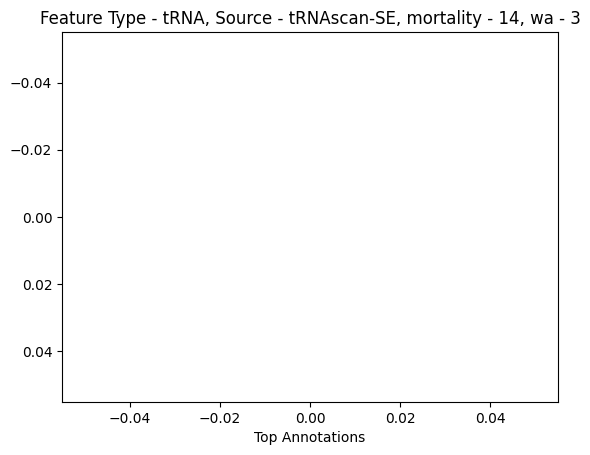

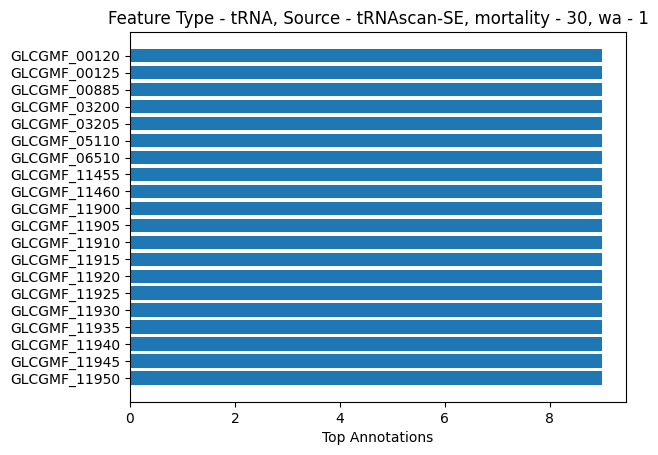

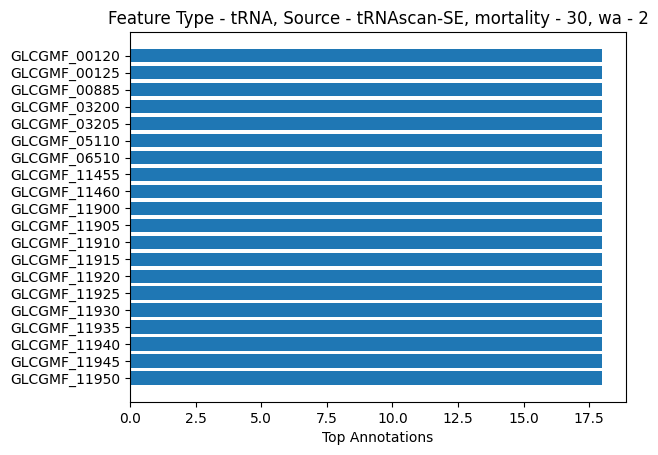

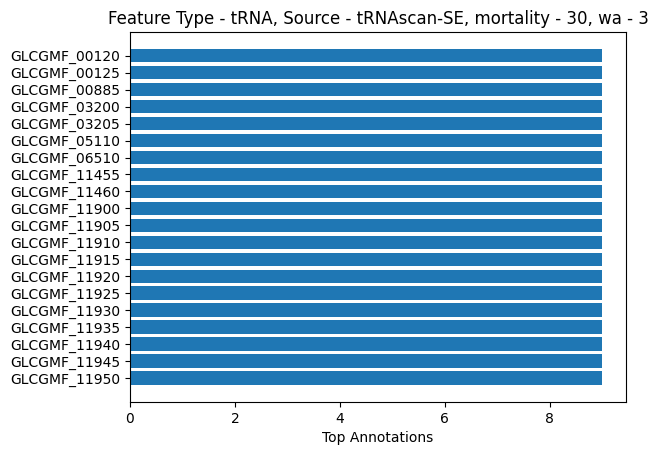

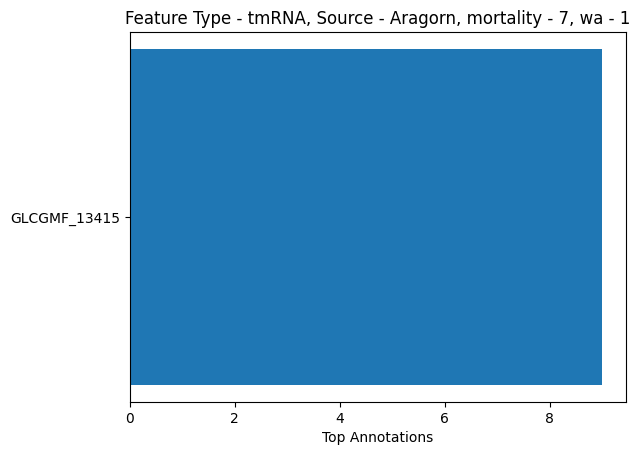

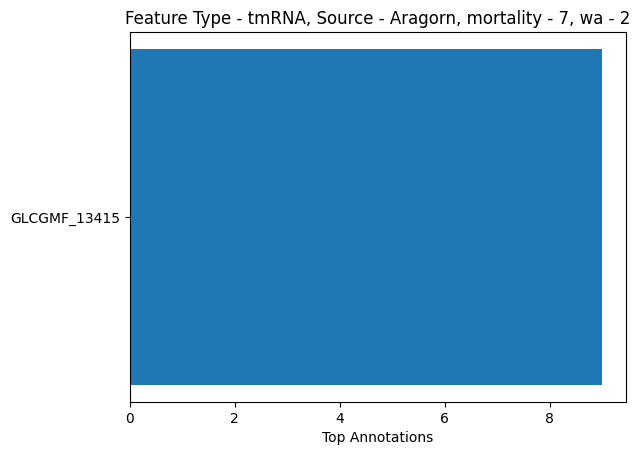

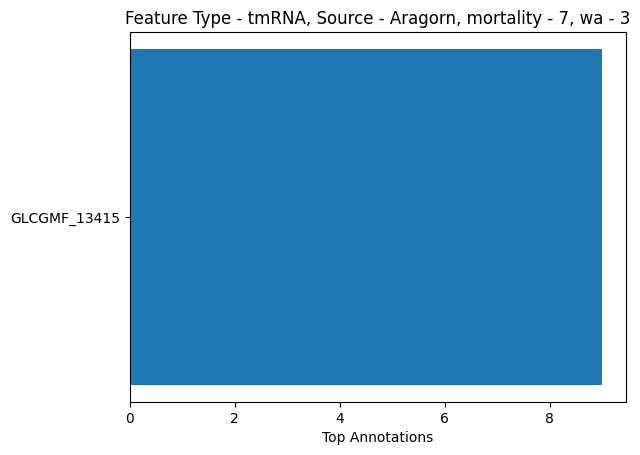

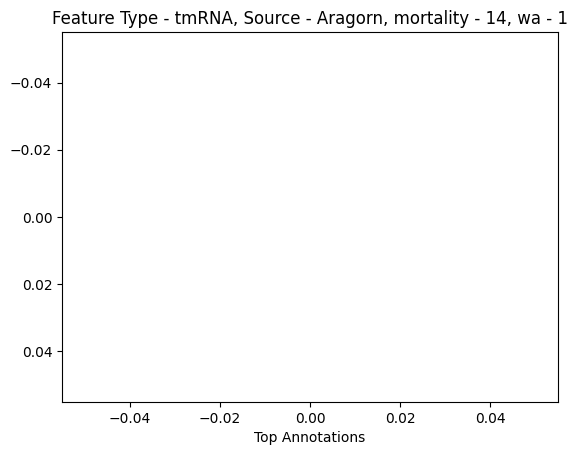

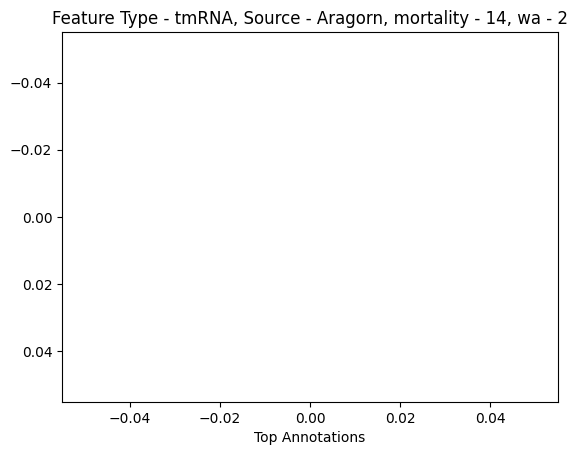

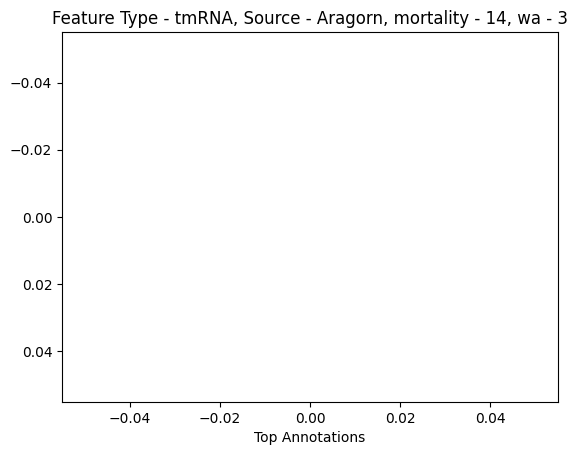

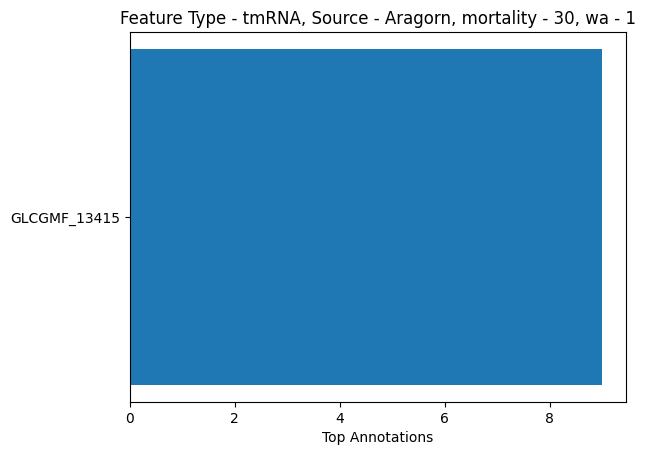

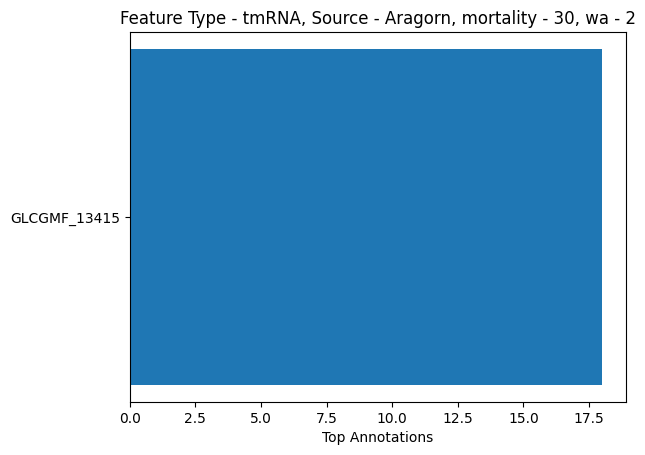

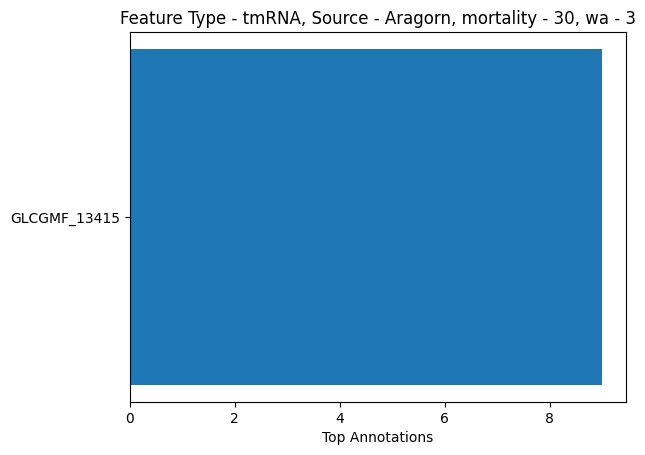

In [76]:
import matplotlib.pyplot as plt


for (featureType, source) in [('CDS', 'Prodigal'), ('CDS', 'Bakta'), ('ncRNA', 'Infernal'), ('oriC', 'BLAST+'), ('oriT', 'BLAST+'), ('rRNA', 'Infernal'), ('regulatory_region', 'Infernal'), ('tRNA', 'tRNAscan-SE'), ('tmRNA', 'Aragorn')]:
    for mortality in [7, 14, 30]:
        for wa in [1, 2, 3]:

            plotDf = finalDf[((finalDf.mortality == mortality) & (finalDf.wa == wa) & (finalDf.feature_type == featureType) & (finalDf.source == source) & (finalDf.preds > 0.8))]

            fig, ax = plt.subplots()

            colName = 'id' if (featureType != 'CDS') else 'gene'

            ax.barh(
                data=plotDf[['sequence_id', colName]].groupby(by=[colName]).agg('count').reset_index().sort_values(by=['sequence_id'], ascending=False)[:20],
                y=colName,
                width='sequence_id',
                align='center'
                )
            # ax.set_yticks(y_pos, labels=people)
            ax.invert_yaxis()  # labels read top-to-bottom
            ax.set_xlabel('Count')
            ax.set_xlabel('Top Annotations')
            ax.set_title('Feature Type - ' + featureType + ', Source - ' + source + ', mortality - ' + str(mortality) + ', wa - ' + str(wa))

            plt.show()

### Plots for showing annotations associated with low risk scores

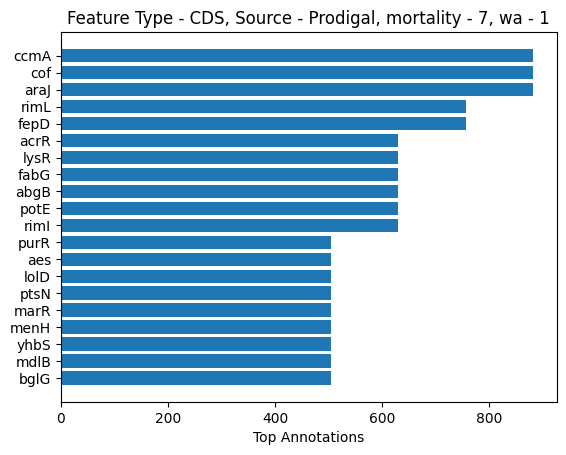

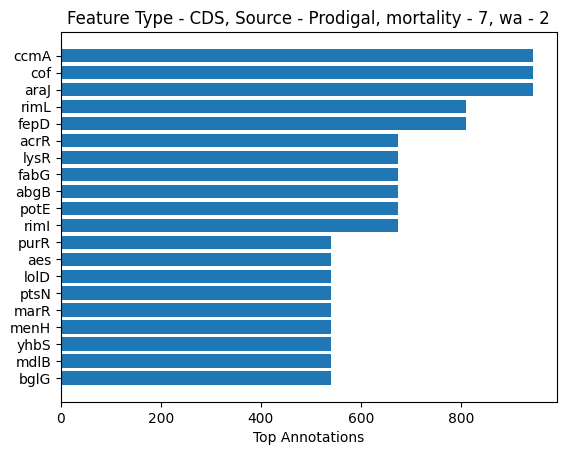

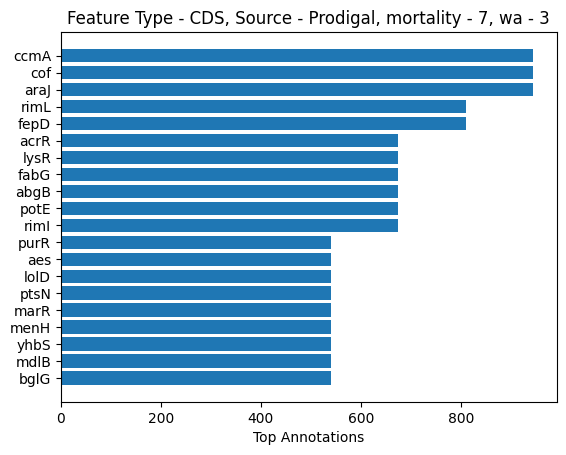

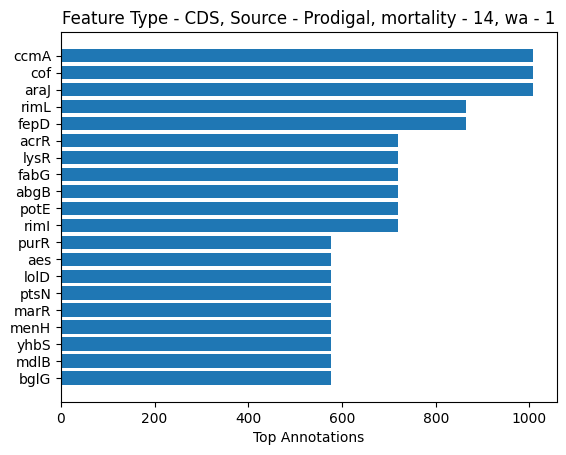

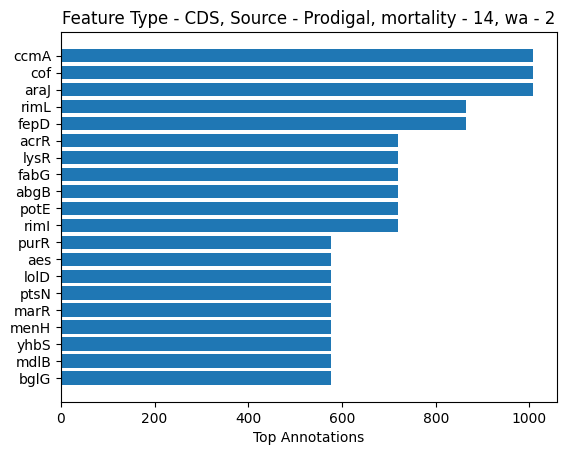

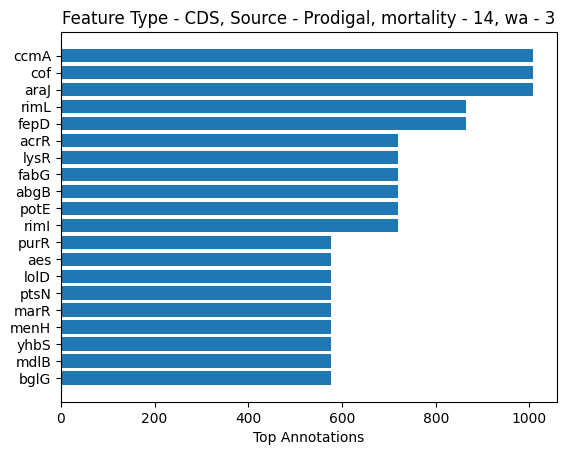

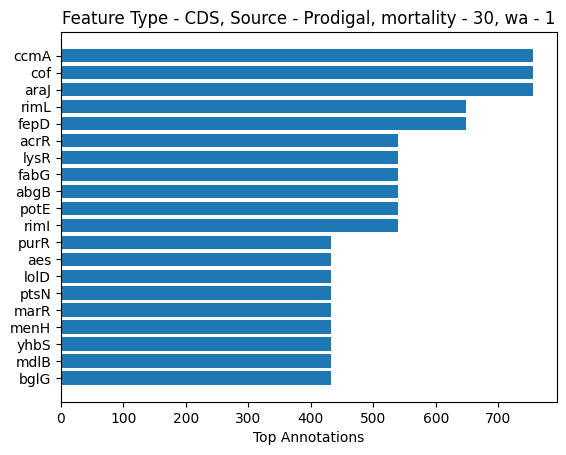

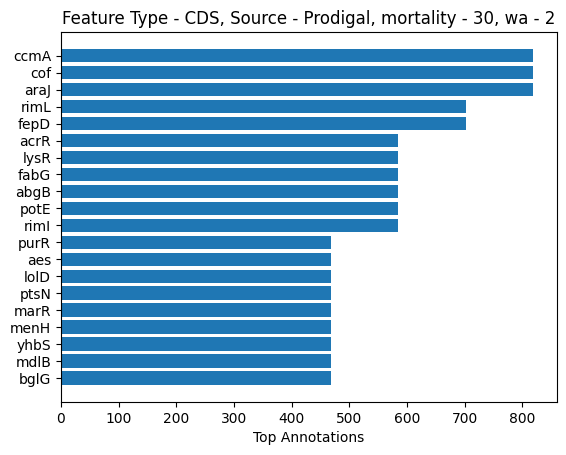

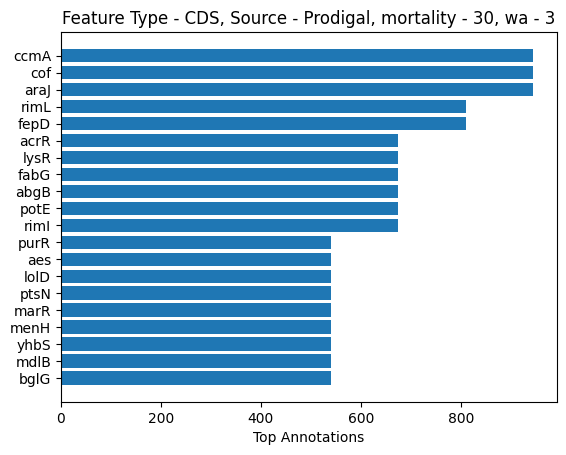

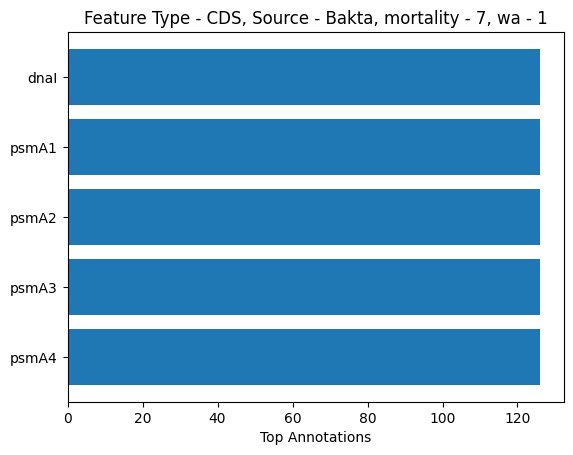

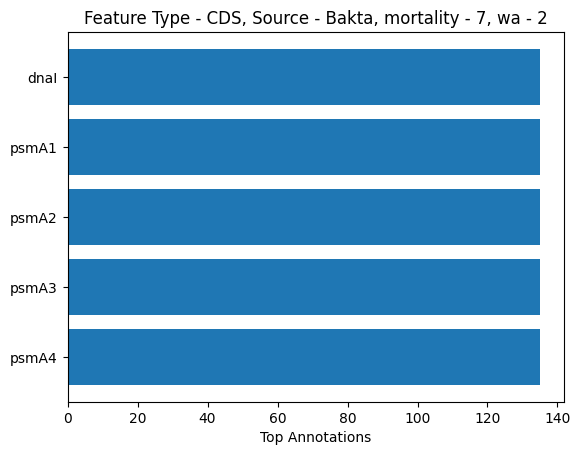

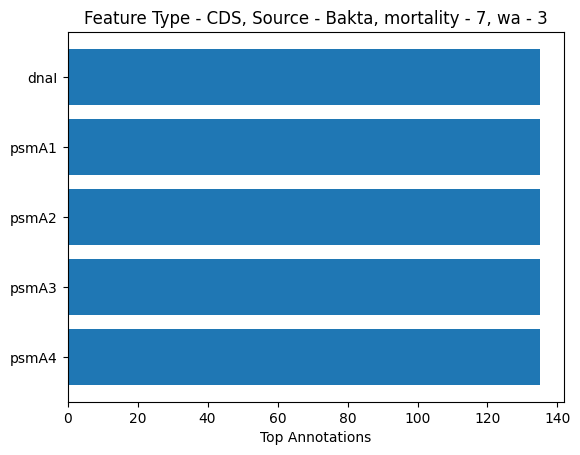

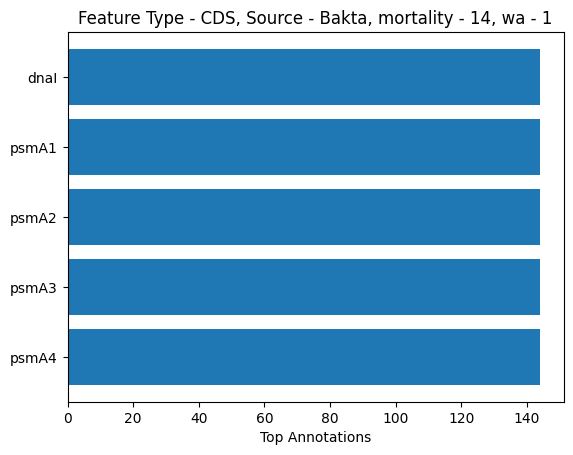

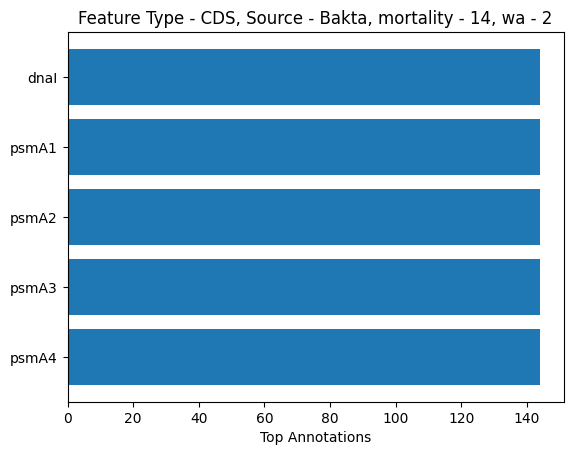

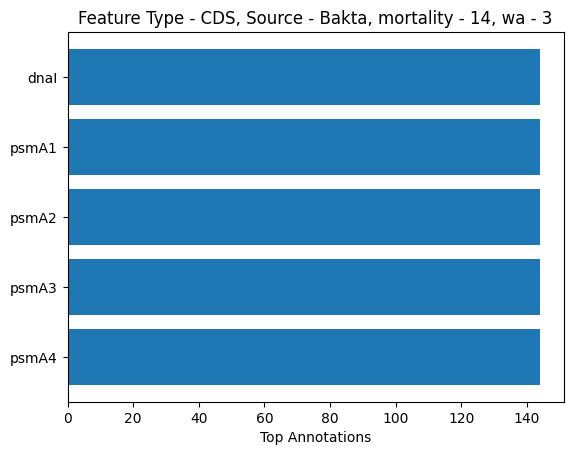

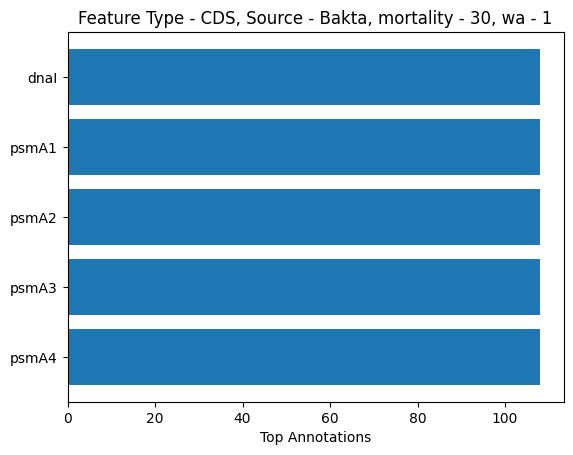

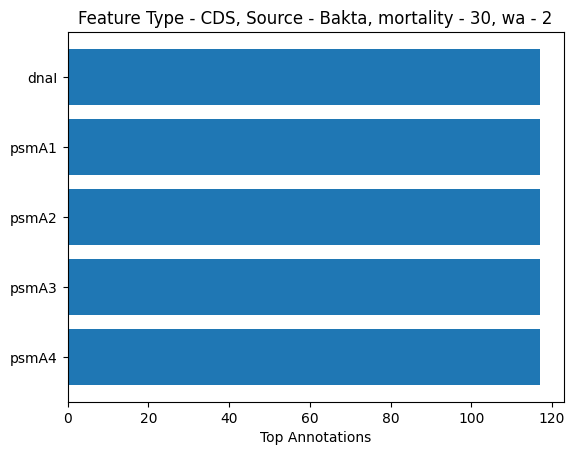

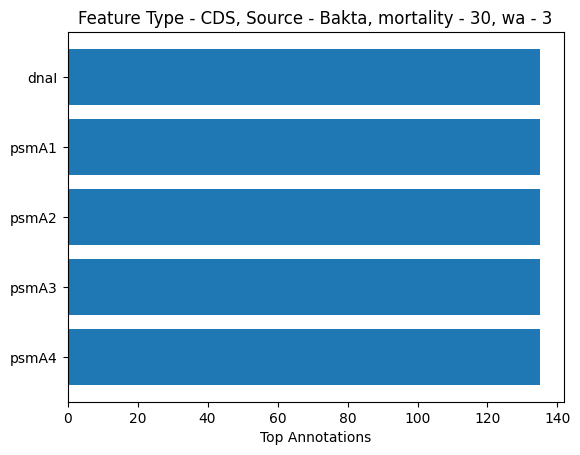

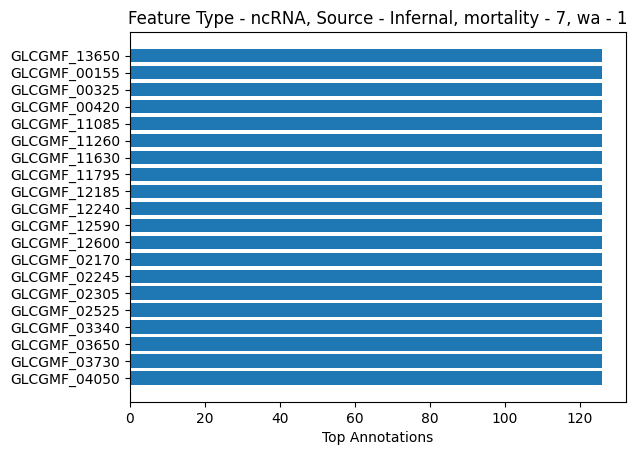

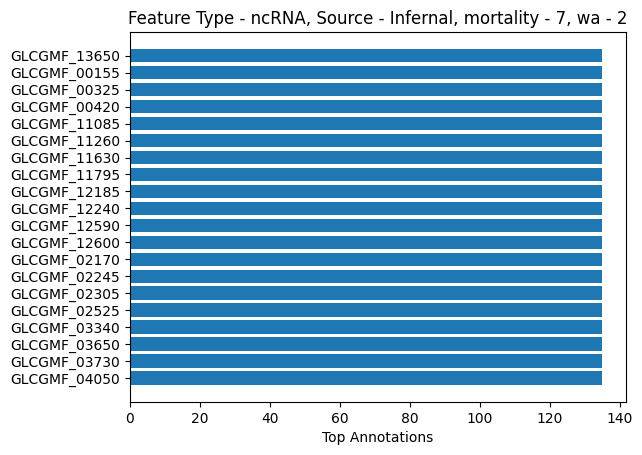

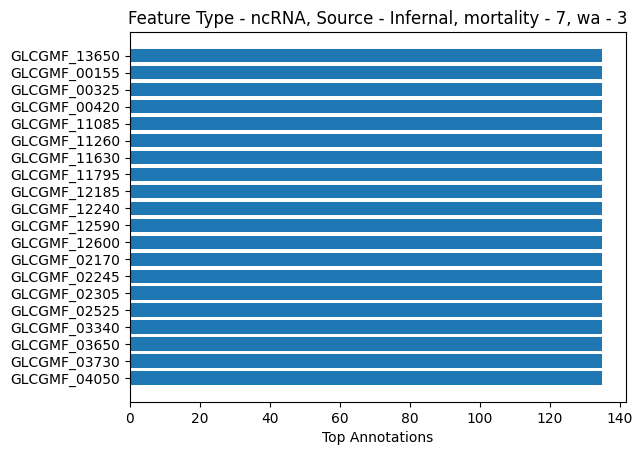

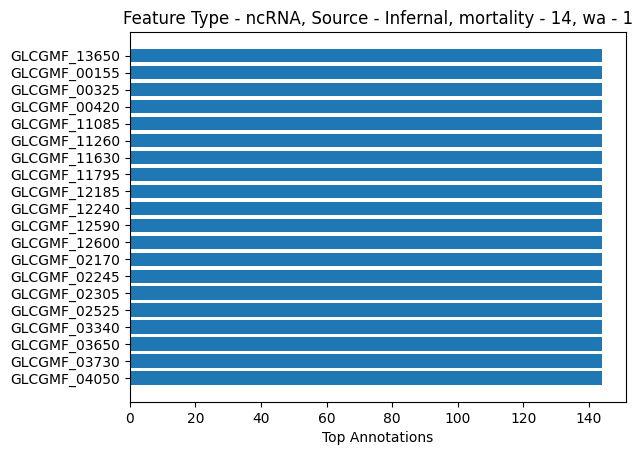

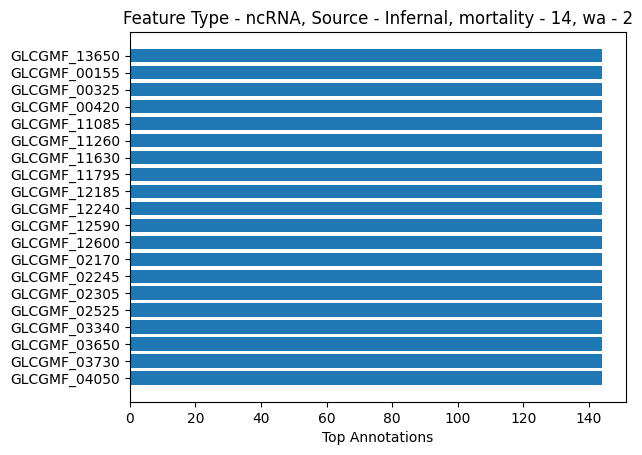

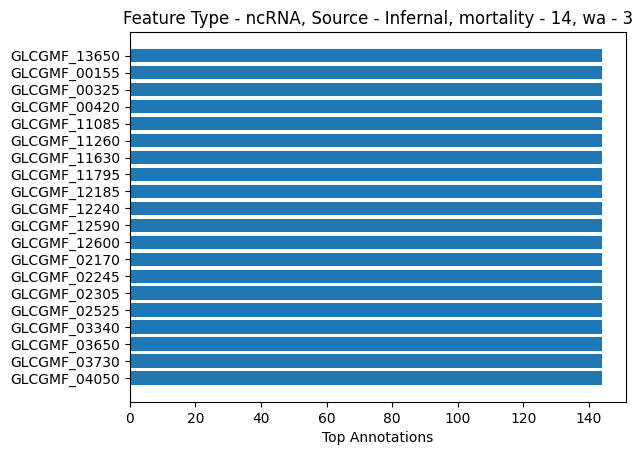

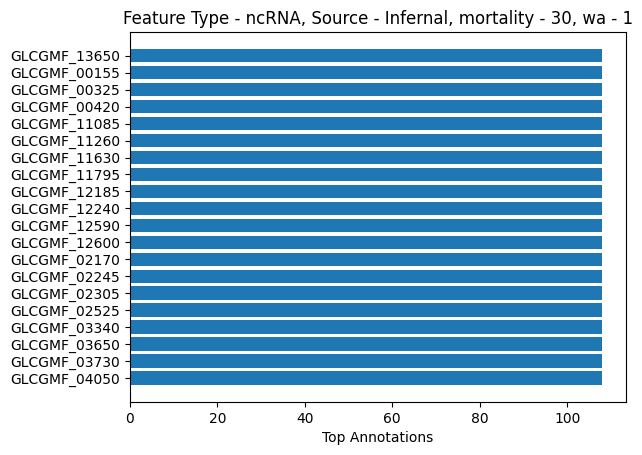

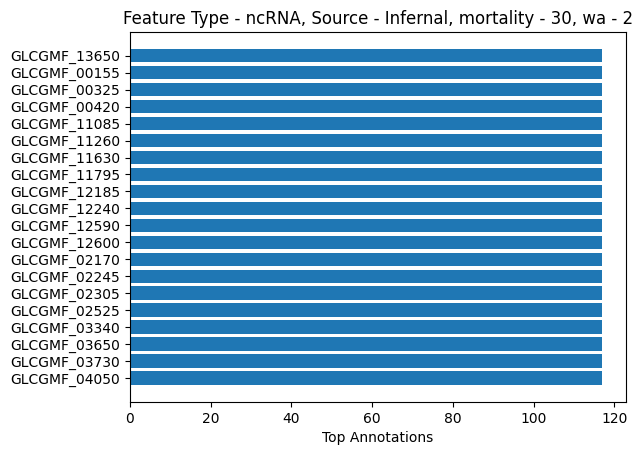

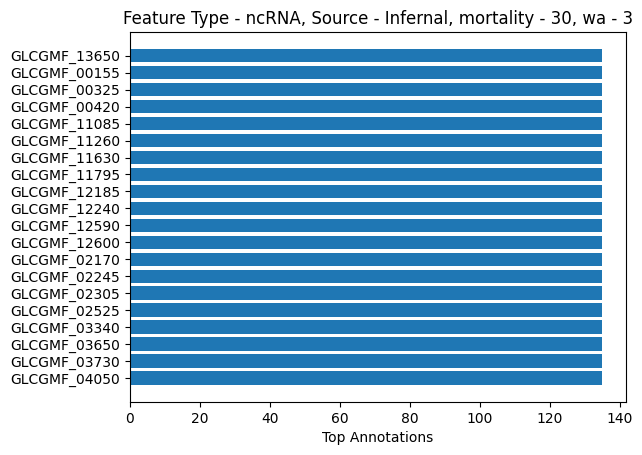

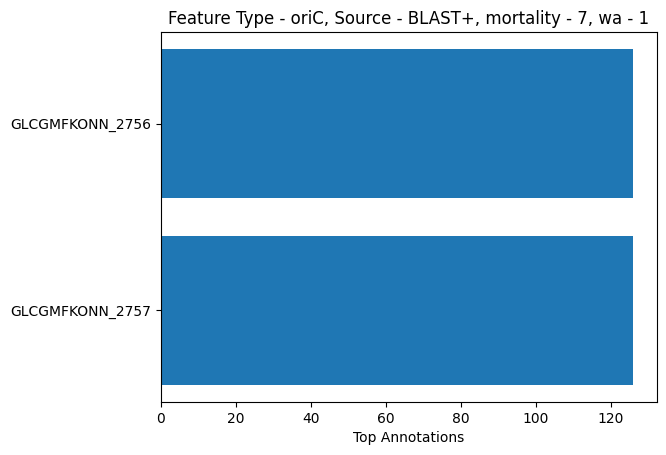

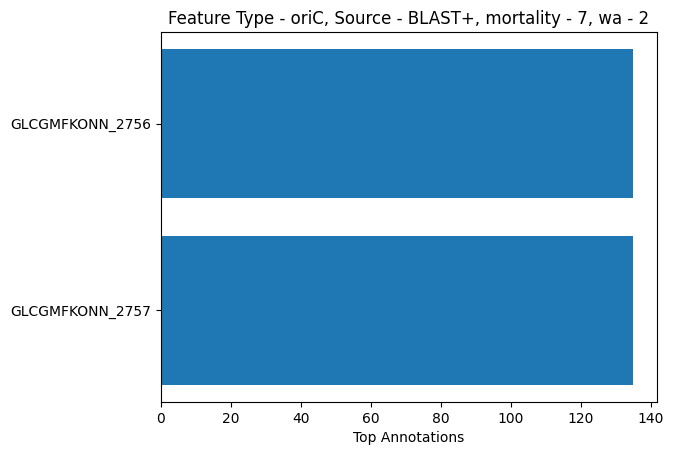

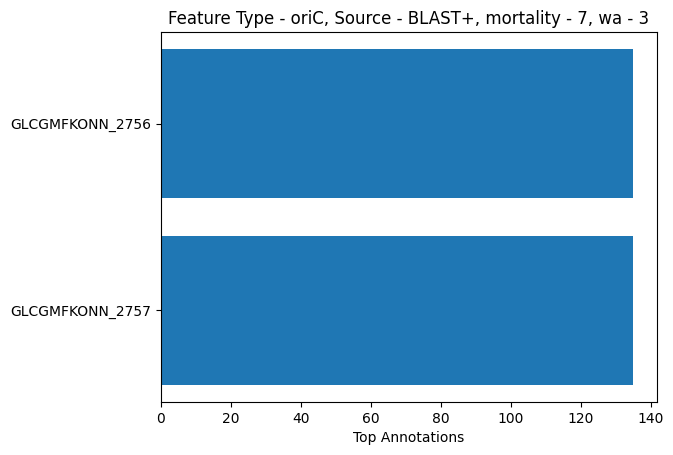

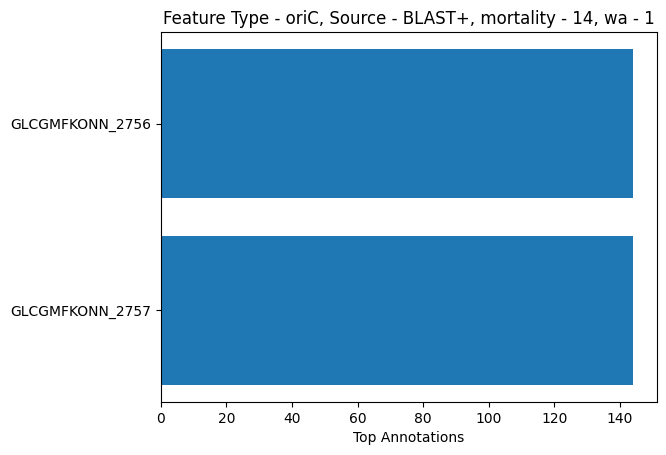

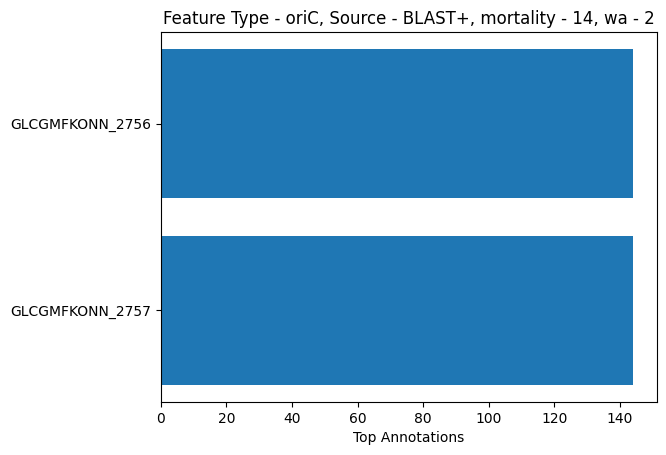

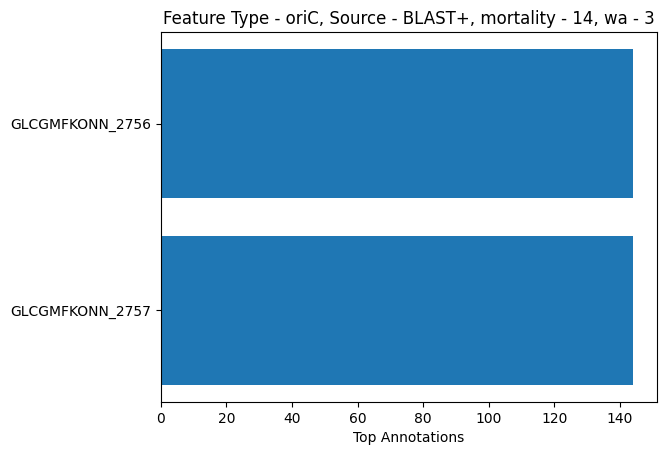

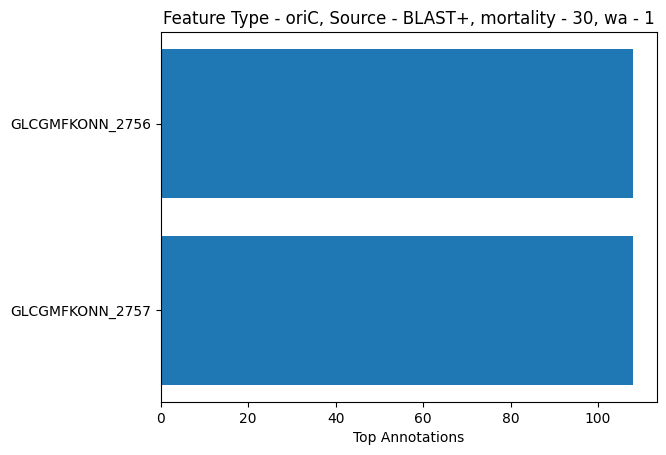

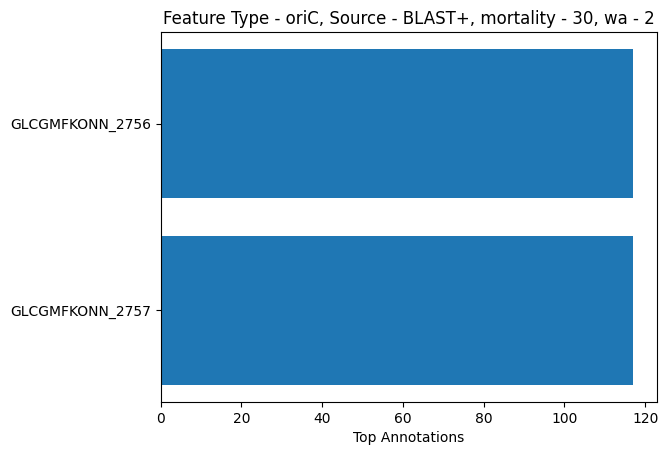

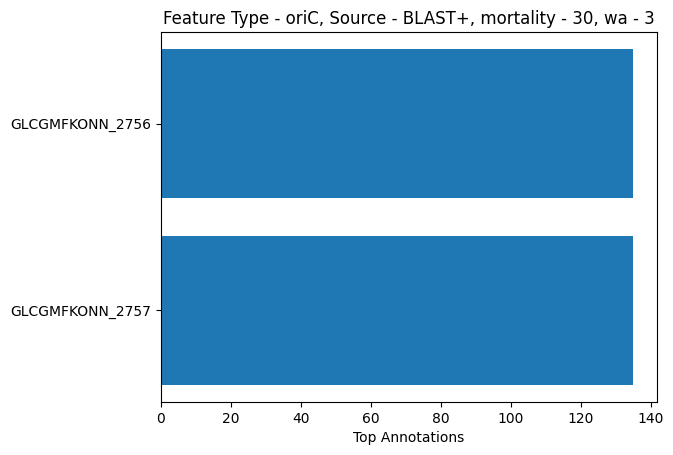

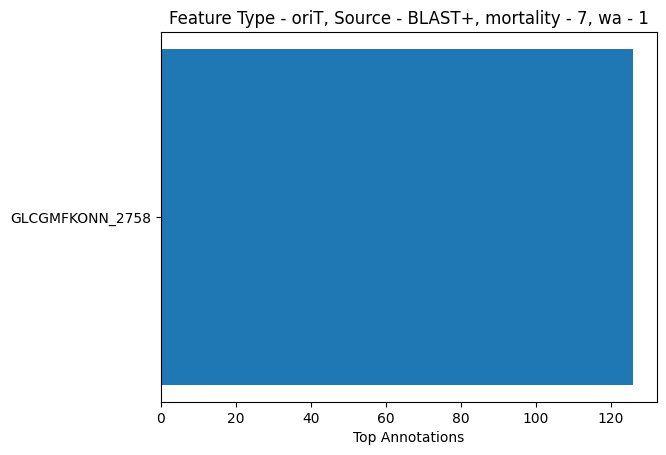

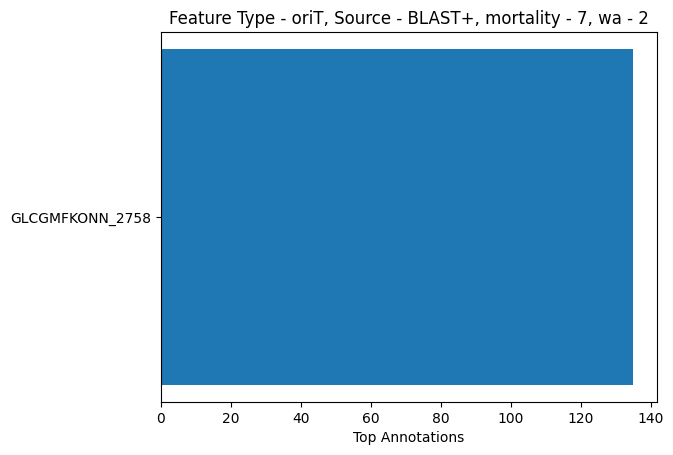

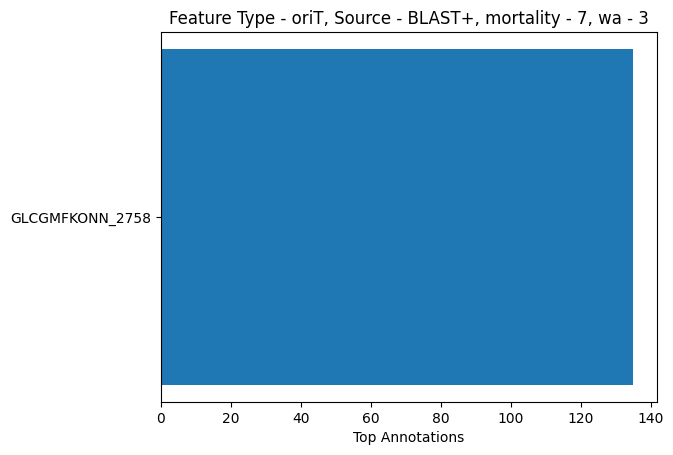

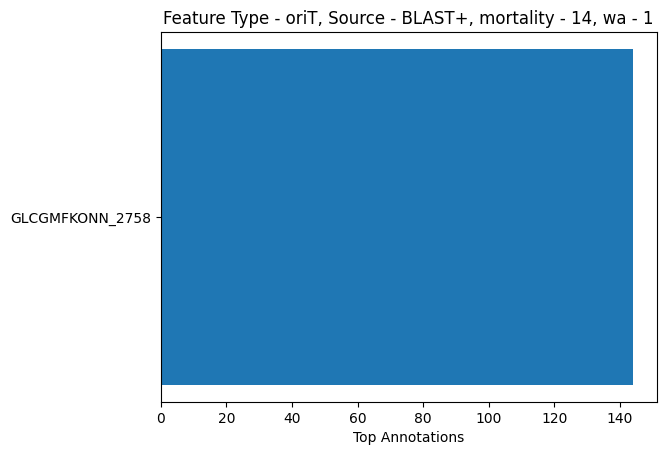

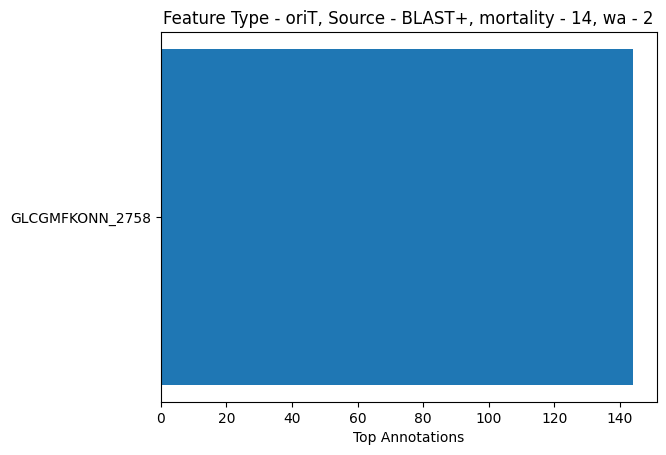

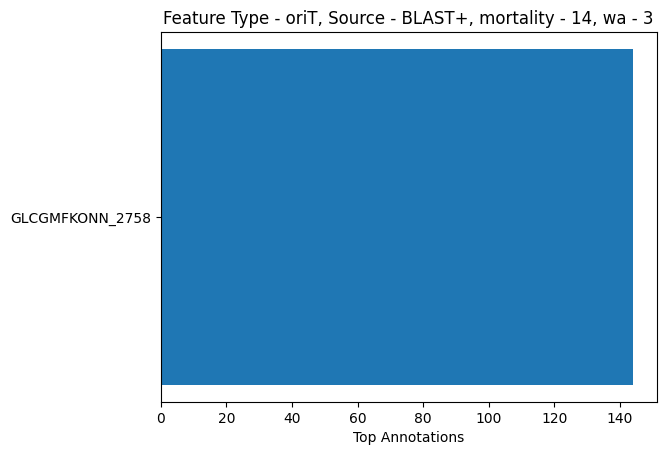

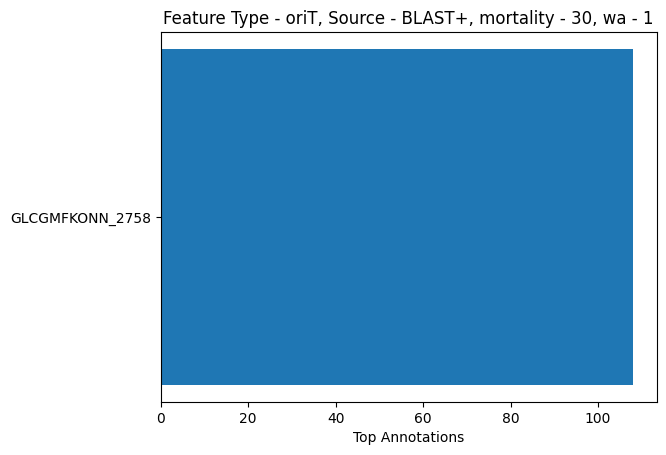

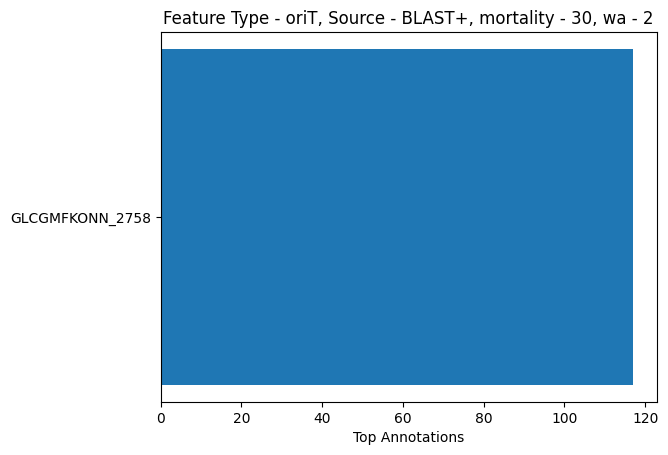

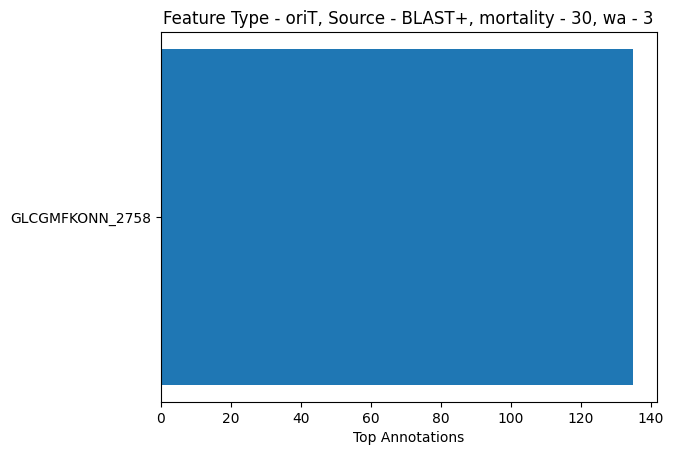

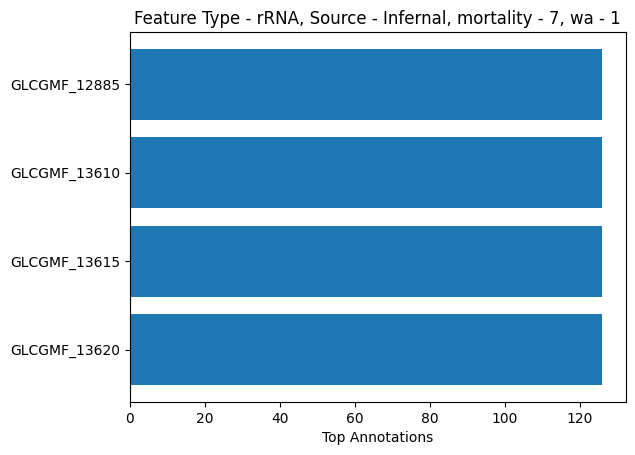

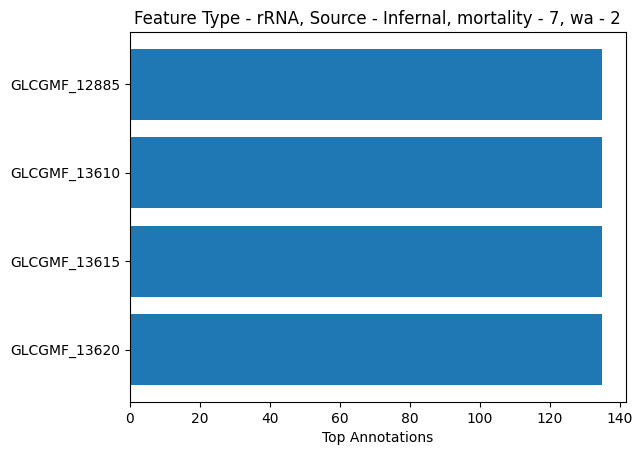

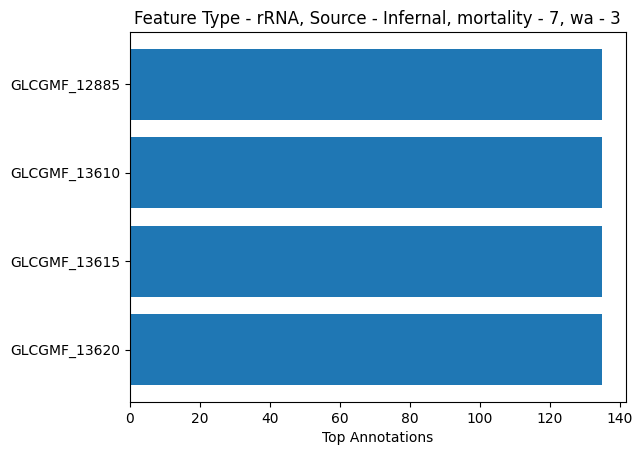

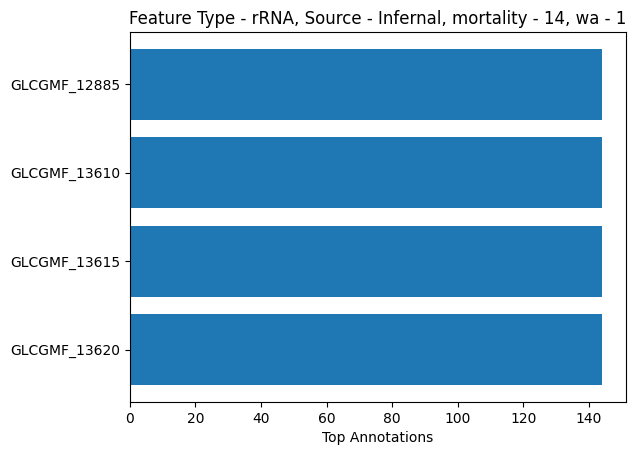

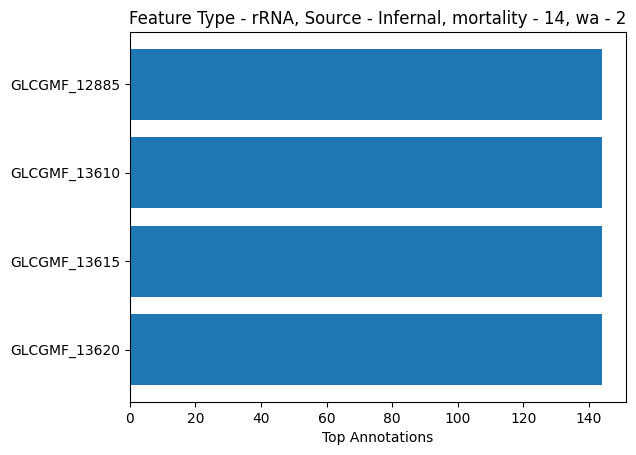

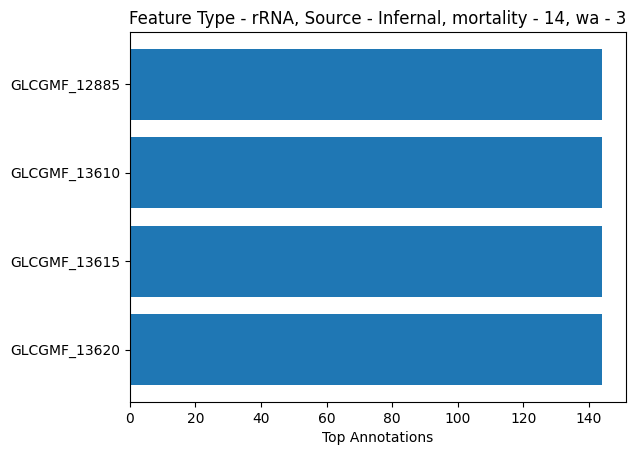

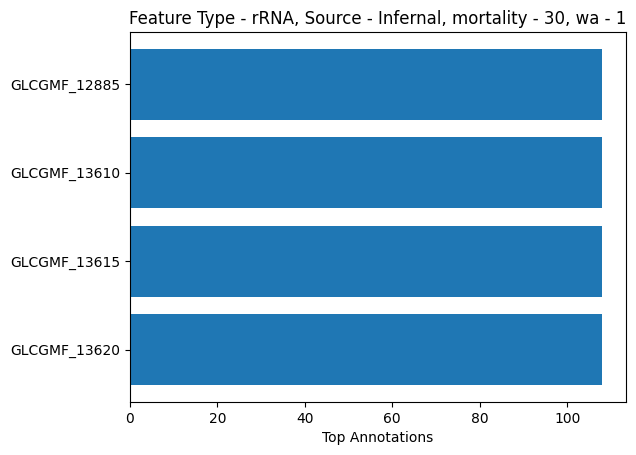

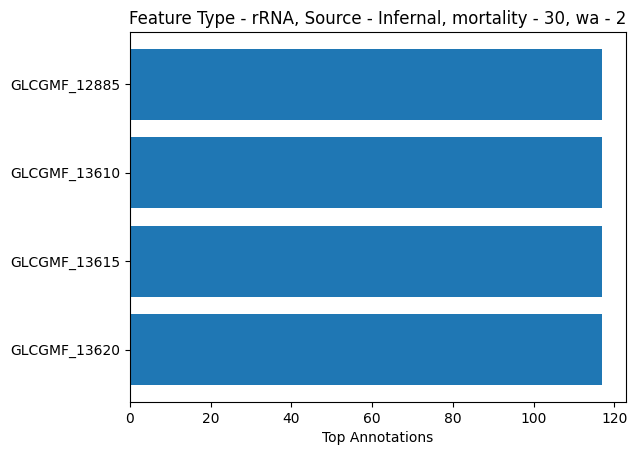

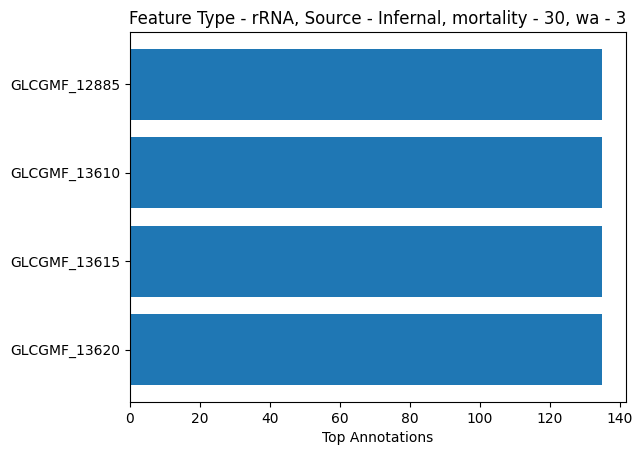

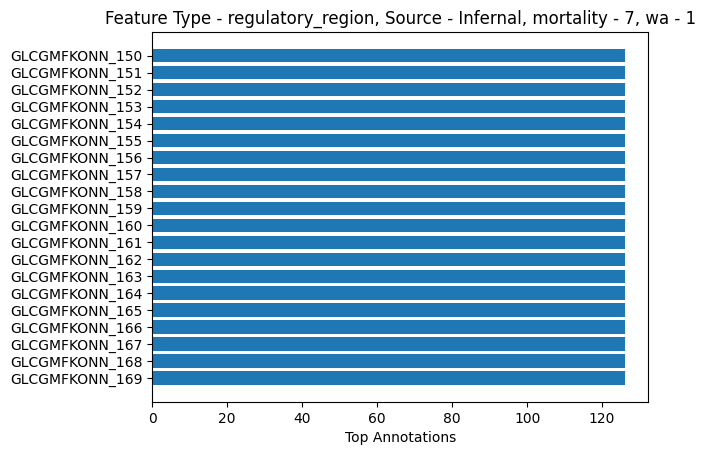

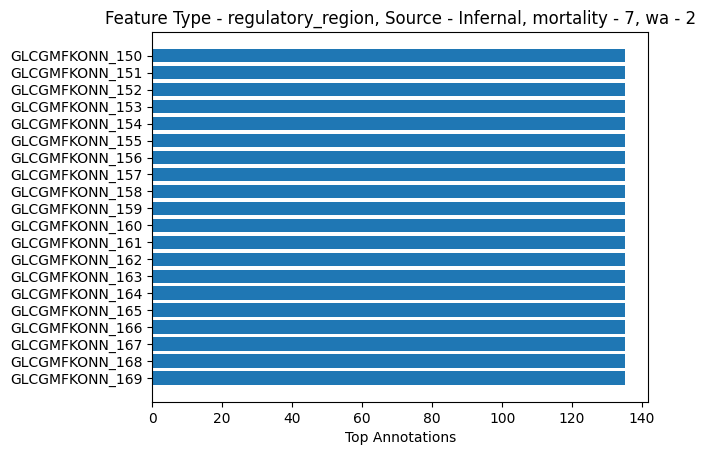

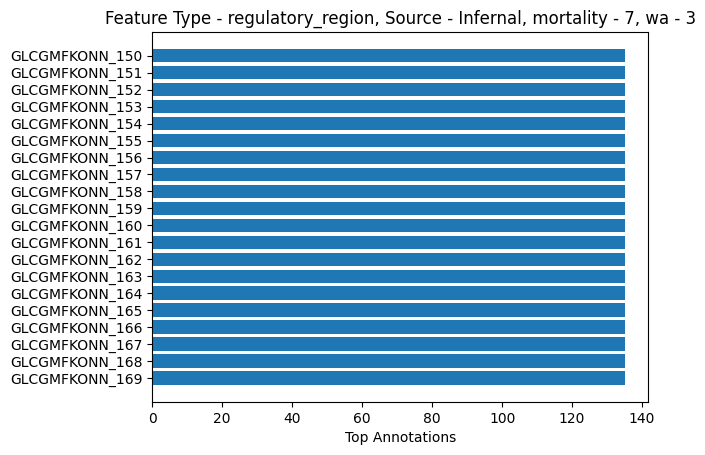

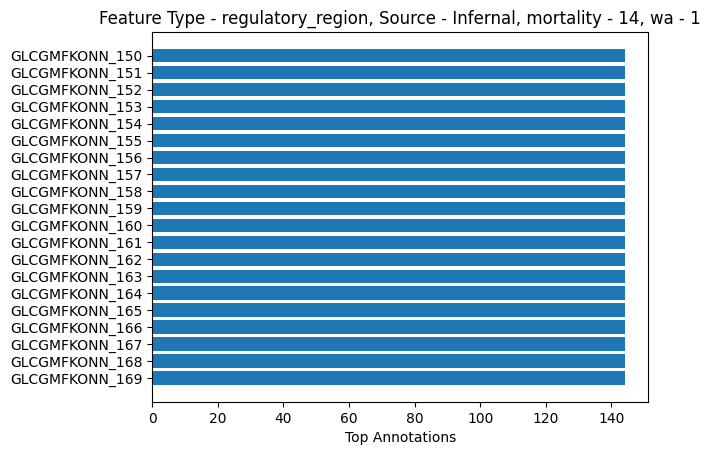

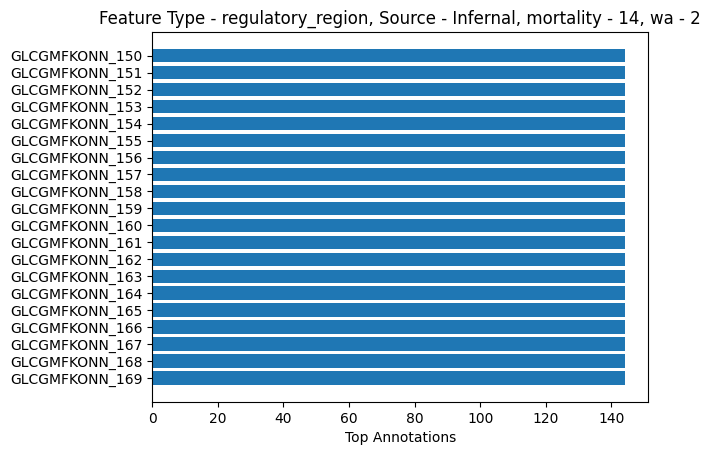

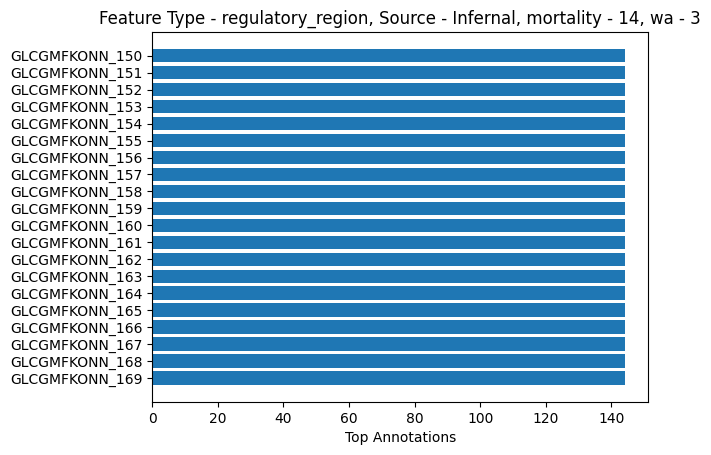

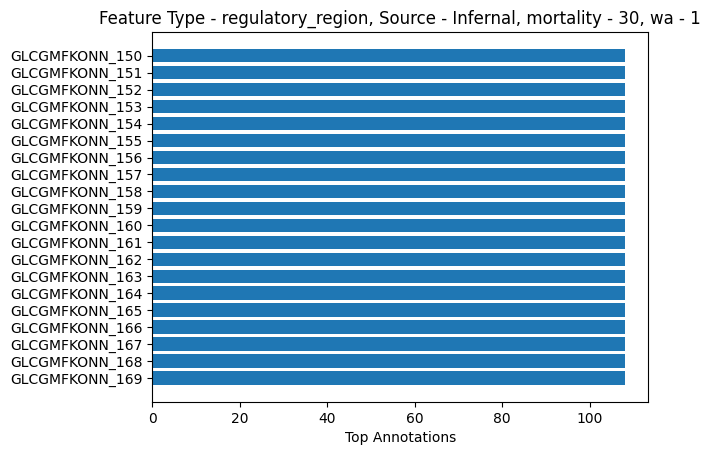

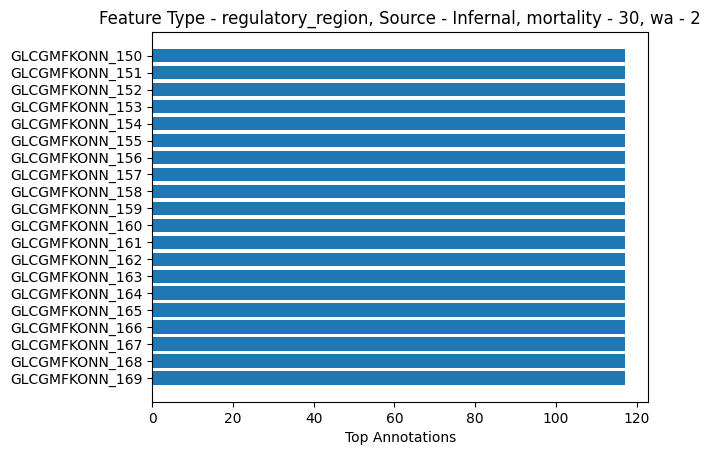

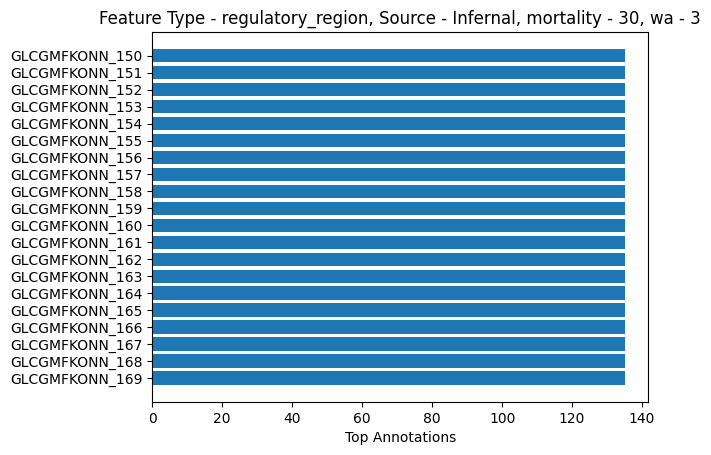

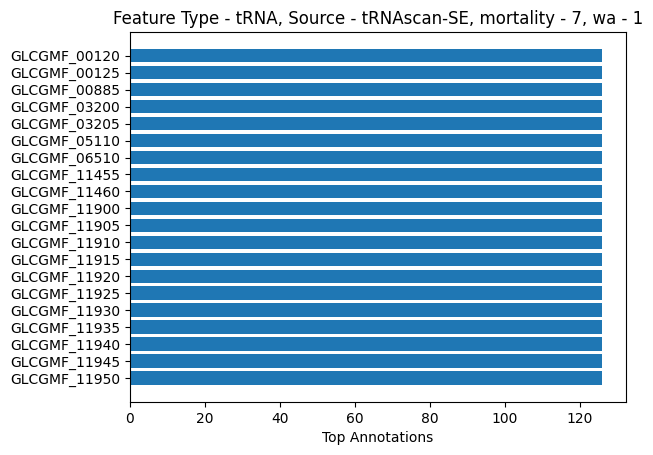

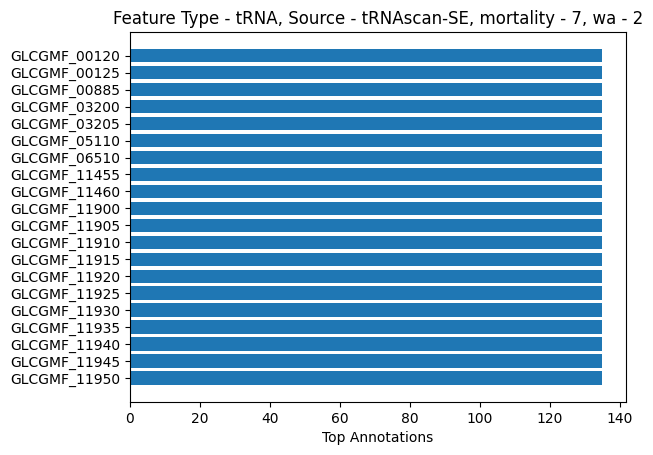

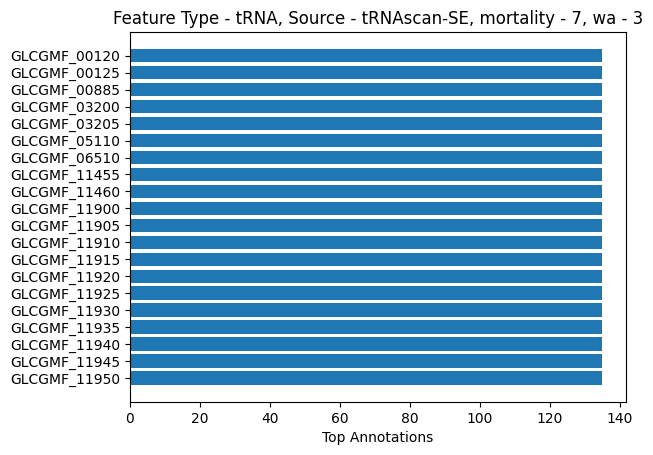

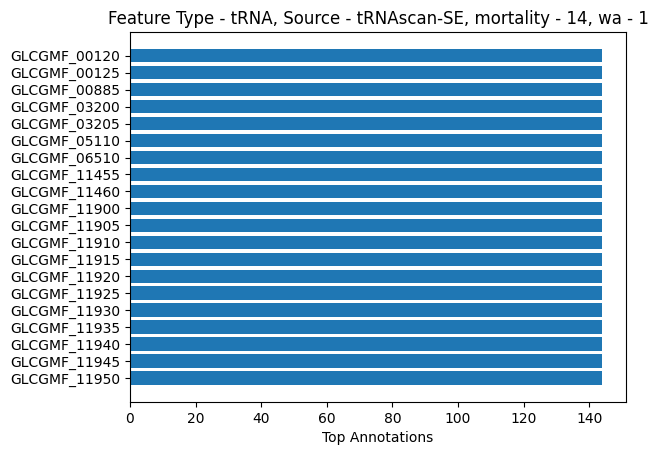

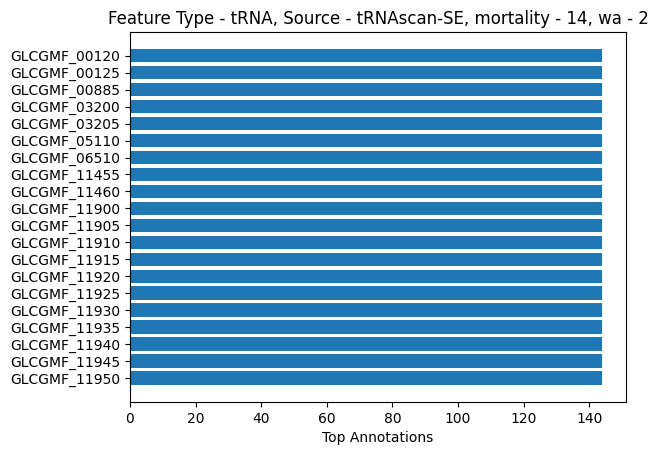

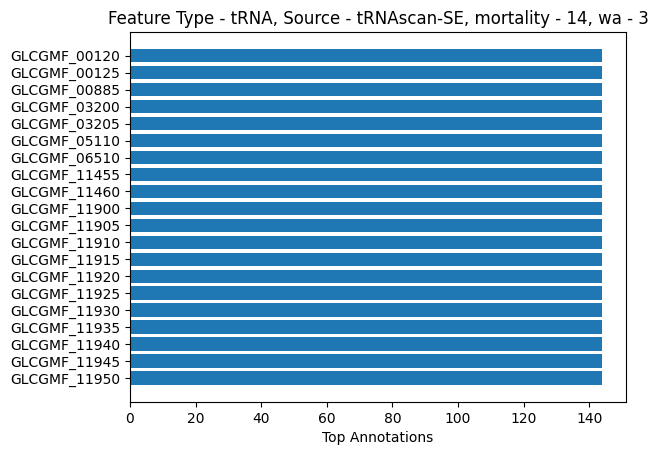

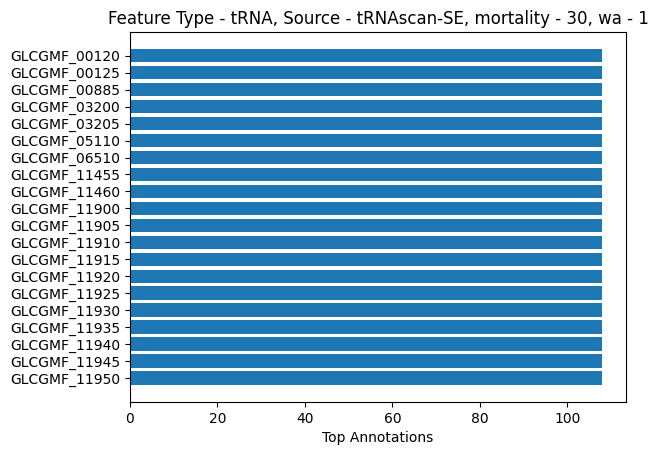

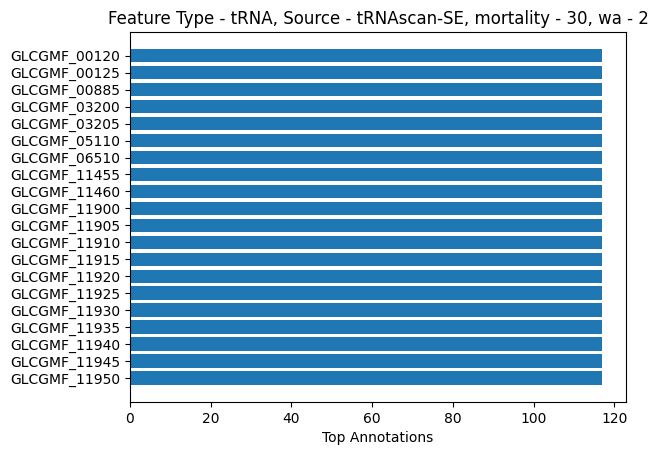

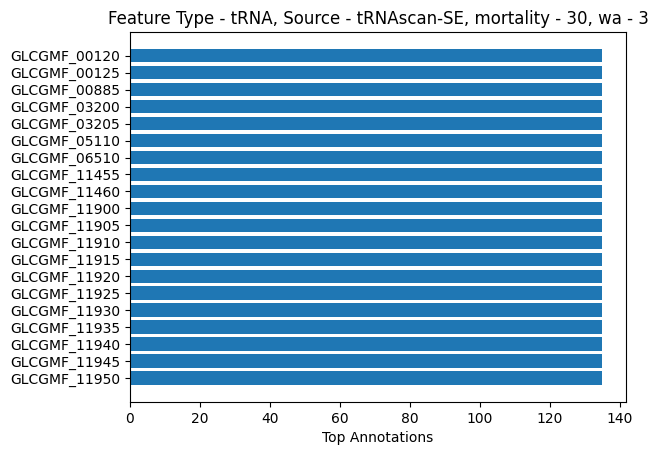

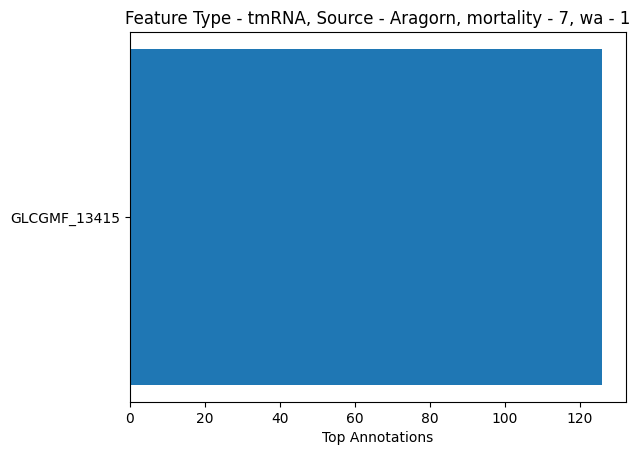

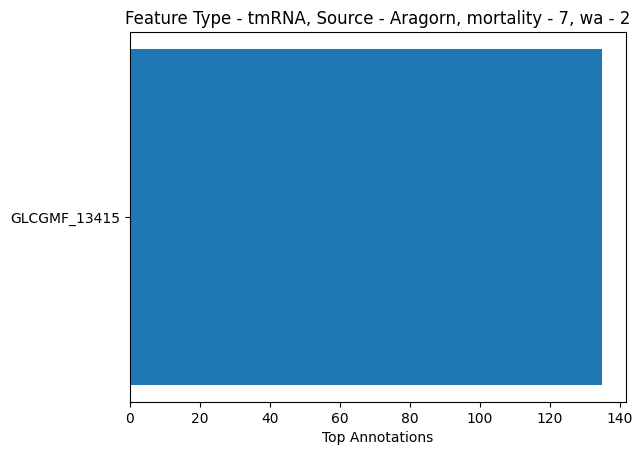

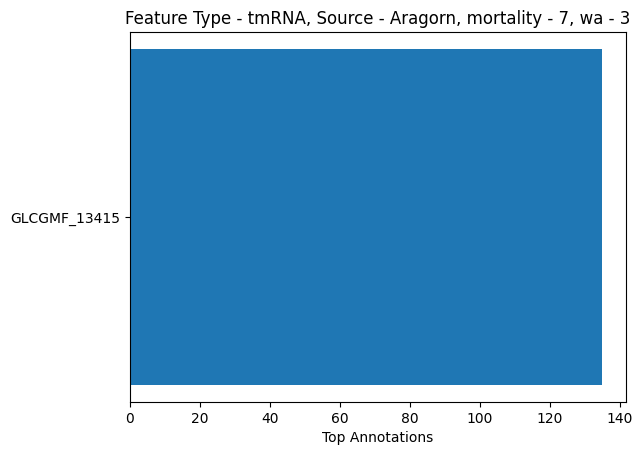

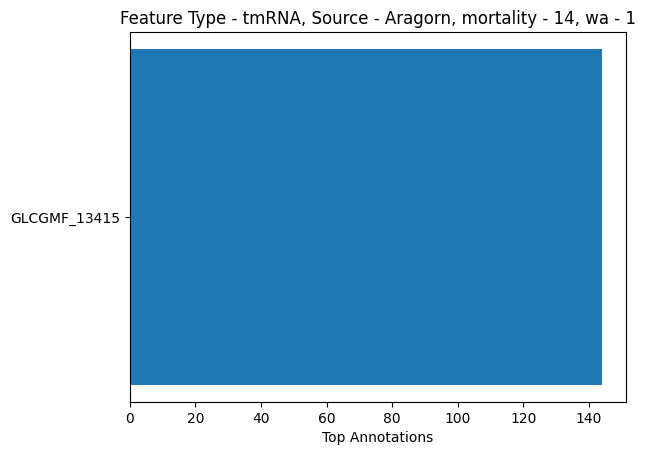

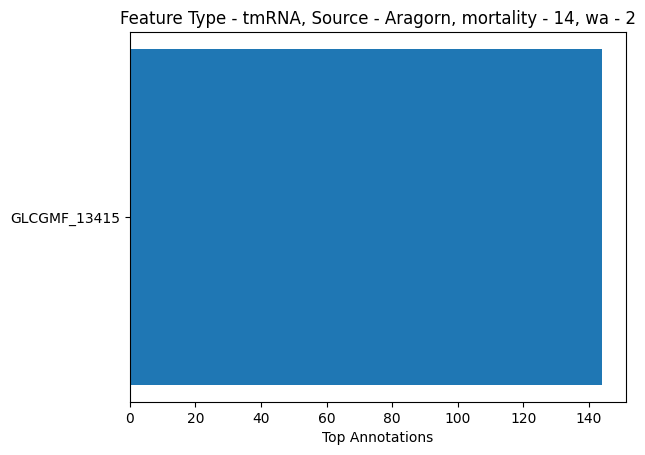

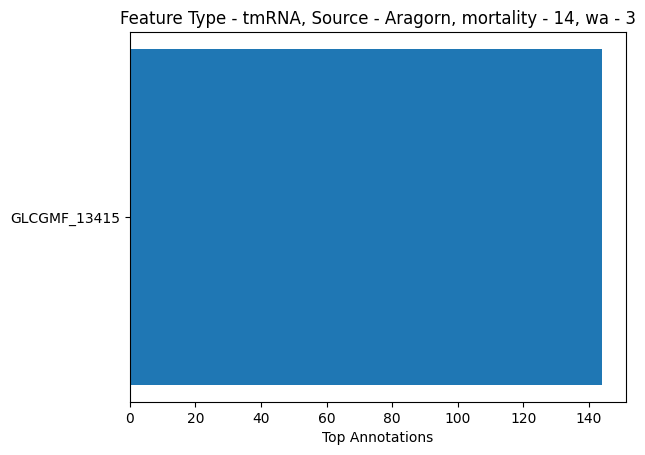

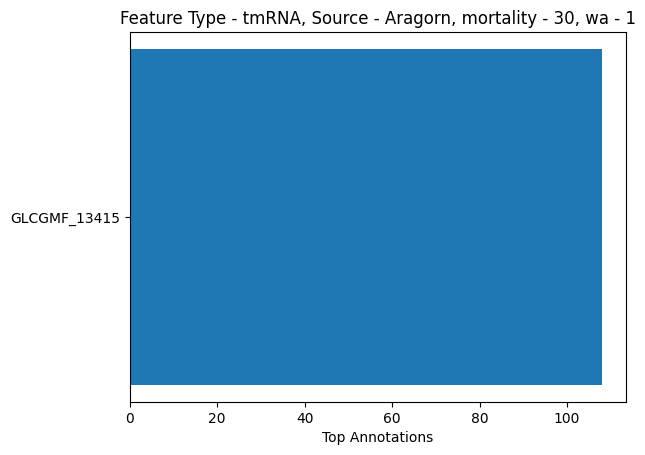

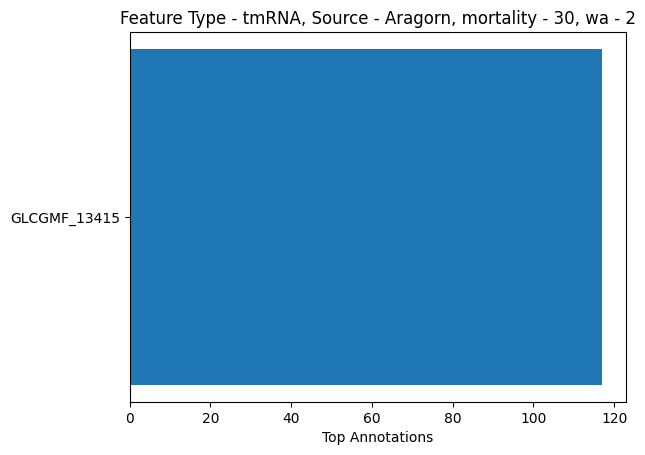

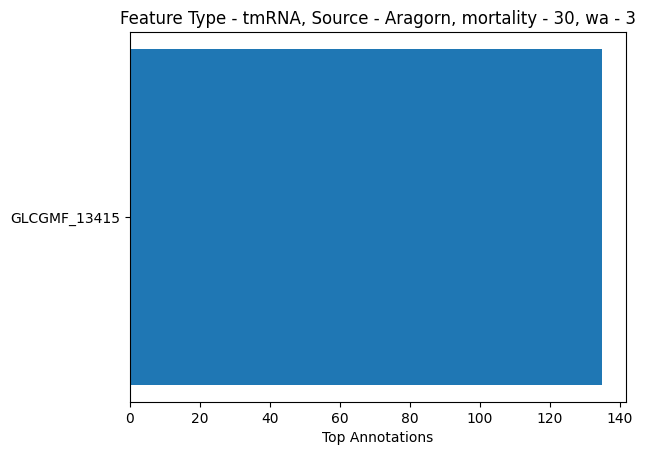

In [77]:
import matplotlib.pyplot as plt


for (featureType, source) in [('CDS', 'Prodigal'), ('CDS', 'Bakta'), ('ncRNA', 'Infernal'), ('oriC', 'BLAST+'), ('oriT', 'BLAST+'), ('rRNA', 'Infernal'), ('regulatory_region', 'Infernal'), ('tRNA', 'tRNAscan-SE'), ('tmRNA', 'Aragorn')]:
    for mortality in [7, 14, 30]:
        for wa in [1, 2, 3]:

            plotDf = finalDf[((finalDf.mortality == mortality) & (finalDf.wa == wa) & (finalDf.feature_type == featureType) & (finalDf.source == source) & (finalDf.preds < 0.2))]

            fig, ax = plt.subplots()

            colName = 'id' if (featureType != 'CDS') else 'gene'

            ax.barh(
                data=plotDf[['sequence_id', colName]].groupby(by=[colName]).agg('count').reset_index().sort_values(by=['sequence_id'], ascending=False)[:20],
                y=colName,
                width='sequence_id',
                align='center'
                )
            # ax.set_yticks(y_pos, labels=people)
            ax.invert_yaxis()  # labels read top-to-bottom
            ax.set_xlabel('Count')
            ax.set_xlabel('Top Annotations')
            ax.set_title('Feature Type - ' + featureType + ', Source - ' + source + ', mortality - ' + str(mortality) + ', wa - ' + str(wa))

            plt.show()